# Parkinson’s Disease Detection from Speech Data
----

### Name: Annika van Rooijen
### Matrikelnummer: s0592559

In [608]:
# Datenanalyse
import pandas as pd
import numpy as np

# Plotten
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Metrics / Validation
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_auc_score, average_precision_score
)
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Feature Selection
from sklearn.feature_selection import SelectFromModel


# 1. Problemstellung
----

### Was ist Parkinson?
Der Morbus Parkinson ist eine chronisch fortschreitende, neurodegenerative Erkrankung, die unter anderem zu steifen Muskeln, verlangsamten Bewegungen und unkontrollierbarem Zittern führt [1]. 

### Was sind Ursachen für die Erkrankung?
Das primäre Parkinson-Syndrom geht von einer bestimmten Hirnregion aus, der sogenannten schwarzen Substanz (Substantia nigra) im Mittelhirn. Hier befinden sich spezielle Nervenzellen, die den Nervenbotenstoff Dopamin produzieren und mit ihm mit anderen Nervenzellen kommunizieren. Dopamin ist unter anderem wichtig für die Bewegungssteuerung. Durch die Parkinson-Erkrankung sterben immer mehr dieser Nervenzellen ab, es entwickeln sich ein Dopaminmangel und ein Ungleichgewicht der Nervenbotenstoffe im Gehirn [1]. 

Die Ursache für den Zelltod bei der Parkinson-Krankheit ist noch nicht eindeutig nachgewiesen. der primäre Parkinson macht etwa 75 Prozent aller Parkinson-Syndrome aus. Von diesem „klassischen“ Parkinson unterscheidet man die sehr seltenen genetischen Formen von Parkinson, das „Sekundäre Parkinson-Syndrom“, das z.B. durch Medikamente, Vergiftungen oder bestimmte Erkrankungen ausgelöst werden kann, und das „Atypische Parkinson-Syndrom“ als Folge verschiedenartiger anderer neurodegenerativer Erkrankungen [1]. 

### Was sind die Symptome der Parkinson Erkrankung? 
Zu den typischen Symptomen gehören das Zittern, weitere Bewegungsstörungen wie Steifheit der Muskeln, verlangsamte Bewegungen und Gleichgewichtsstörungen. Zusätzliche Symptome können das „Einfrieren“ von Bewegungen, Schwierigkeiten beim Sprechen und Schlucken, Störungen der vegetativen Funktionen (z. B. Blutdruck und Verdauung), Schlafstörungen, Depressionen und geistige Beeinträchtigungen bis hin zur Demenz sein [1].

Sprach- und Stimmveränderungen treten häufig auf und können bereits Jahre vor den klassischen motorischen Symptomen beobachtet werden. Diese frühen Veränderungen bieten ein Potenzial für eine frühere Erkennung und Überwachung der Krankheit, was wichtig wäre, da Diagnosen derzeit meist erst erfolgen, nachdem erheblicher neuronaler Verlust stattgefunden hat. Dies sind für Ärzt:innen schwer nur durchs hören erkennbar [2]. 

Zu den Veränderungen zählen eine verminderte Lautstärke (Hypophonie), eine monotone Sprechweise mit reduzierter Tonhöhen- und Lautstärkenvariation, eine verlangsamte oder unregelmäßige Sprechgeschwindigkeit sowie eine unpräzise Artikulation, bei der insbesondere Konsonanten weniger deutlich gebildet werden. Zusätzlich zeigen sich veränderte Pausenmuster, eine eingeschränkte Prosodie ((Prosodie = Betonung, Rhythmus, Melodie der Sprache)) mit flacher Betonung und reduziertem emotionalem Ausdruck sowie eine verminderte Stimmstabilität mit Schwankungen in Tonhöhe und Stimmqualität. Bei komplexeren Sprachaufgaben können außerdem Wortfindungsprobleme und eine reduzierte sprachliche Vielfalt auftreten. Diese Veränderungen sind oft so subtil, dass sie klinisch allein durch Zuhören schwer erkennbar sind und erst durch objektive, akustische und digitale Analyseverfahren zuverlässig erfasst werden können [2].

### Zielstellung
Die manuelle Analyse von Sprachaufnahmen ist häufig zeitaufwendig und mit einer begrenzten Zuverlässigkeit verbunden. Vor diesem Hintergrund stellt sich die Frage, ob künstliche Intelligenz in der Lage ist, Sprach- und Frequenzdaten automatisiert auszuwerten, um Hinweise auf eine neurodegenerative Erkrankung wie Parkinson zu erkennen. Ziel ist die Entwicklung eines KI-Modells, das anhand von Sprachaufnahmen und akustischen Merkmalen eine Parkinson-Erkrankung  identifizieren kann.

## 2. Datenbeschaffung
----

Es gibt zahlreiche öffentlich verfügbare Datensätze zur Analyse von Parkinson anhand von Sprach- und Stimmmerkmalen. Die folgende Tabelle gibt einen Überblick über relevante Datensätze:

| Datensatzname | Datentyp | Inhalt | Größe / Umfang | Quelle |
|---------------|----------|--------|----------------|--------|
| UCI Parkinsons Dataset | Tabellarische Features | Frequenzmerkmale (Jitter, Shimmer, HNR, F0…) aus Sprachaufnahmen | 31 Personen, 195 Aufnahmen | https://archive.ics.uci.edu/dataset/174/parkinsons |
| UCI Parkinson Speech with Multiple Types of Audio | Tabellarische Features | Sustained Vowel, Wörter, Zahlen, Sätze | 40 Personen, mehrere hundert Audios | https://archive.ics.uci.edu/dataset/301/parkinson+speech+dataset |
| Figshare Parkinson Voice Samples | Audio (.wav) | Sustained Vowel /a/, Parkinson vs. Healthy | 100+ Aufnahmen | https://figshare.com/articles/dataset/23849127 |
| SJTU Parkinson Speech Dataset | Audio (.wav) | Verschiedene Sprachproben (Original-Speech) | > 150 Dateien | https://github.com/SJTU-YONGFU-RESEARCH-GRP/Parkinson-Patient-Speech-Dataset |
| Italian Parkinson’s Voice & Speech | Audio | Italienische Sprecher, Wörter, Vokale, Sätze | > 800 Aufnahmen, 65 Sprecher | https://ieee-dataport.org/open-access/italian-parkinsons-voice-and-speech |
| Mendeley Parkinson Acoustic Features | Tabellarische Features | Akustische Merkmale (MFCC, Jitter, Shimmer…) | ca. 200+ Einträge | https://data.mendeley.com/datasets/fjd6fcfkwn |
| NeuroVoz Parkinsonian Speech Corpus | Audio | Monologe, Vokale, Wörter, Wiederholungen, längere Sprache | 108 Sprecher |https://zenodo.org/records/10777657 (nicht öffentlich zugänglich)|
| PC-GITA Corpus | Audio | Spanische Sprecher, mehrere Sprachaufgaben, Parkinson vs. Healthy | 235 Sprecher | https://perception.csl.illinois.edu/PC-GITA.html (nicht öffentlich verfügbar)|
| MDVR-KCL Parkinson Voice Dataset | Audio | Sustained vowel phonation „a“, klinisch diagnostiziert | 40 Sprecher, 400+ Samples | https://www.kaggle.com/datasets/nutansingh/mdvr-kcl-dataset |
| mPower Parkinson Dataset | Audio + Sensorik | Smartphone-Sprachaufnahmen, longitudinal, Real-World-Daten | Tausende Teilnehmende | https://www.synapse.org/#!Synapse:syn4993293 |
| Parkinson Telemonitoring Dataset | Zeitreihen / Features | Sprachbasierte UPDRS-Messungen | 42 Personen, 5.875 Messungen | https://archive.ics.uci.edu/dataset/189/parkinsons+telemonitoring |
| German Parkinson Speech Corpus (nicht offen) | Audio | Deutsche Sprache, klinische Studien | Variabel | Nur über Forschungskooperation |
| RBD / Prodromal PD Speech Datasets | Audio | Sprachdaten von Hochrisikogruppen (prodromales Parkinson) | Forschungsdaten | Nicht öffentlich |



Für dieses Projekt wurden bewusst zwei unterschiedliche, sich ergänzende Datensätze ausgewählt. Der **UCI Parkinsons Datensatz** [5] dient als Einstieg und Benchmark, da er bereits extrahierte akustische Frequenzmerkmale enthält und eine schnelle, methodisch saubere Evaluation klassischer Machine-Learning-Modelle ermöglicht.


# 3. Globale Eigenschaften: Oxford Parkinson's Disease Detection Dataset
-----
Der Datensatz besteht aus 2 Tabellen:
1. `parkinsons.data`
2. `parkinsons_updr.data`

Für diese Arbeit wird ausschließlich der Datensatz *parkinson.data* verwendet, da dieser explizit für eine Klassifikationsaufgabe konzipiert ist und die Unterscheidung zwischen erkrankten und gesunden Personen ermöglicht. Der zweite Datensatz eignet sich hingegen primär für eine Regressionsaufgabe zur Vorhersage des UPDRS-Scores.

## 3.1. Variablenübersicht

Der Datensatz umfasst akustische, rauschbasierte sowie nichtlineare Merkmale, die unterschiedliche Aspekte der Stimmproduktion abbilden. Während Jitter- und Shimmer-Parameter kurzfristige Instabilitäten der Frequenz und Amplitude beschreiben, erfassen nichtlineare Maße wie RPDE, DFA oder PPE komplexe zeitliche Strukturen des Sprachsignals. 

| Variable | Beschreibung | Datentyp | Skalenniveau |
|--------|-------------|----------|--------------|
| `name` | Eindeutiger Bezeichner der Person und der jeweiligen Aufnahme (z. B. `phon_R01_S01_1`) | String-Object | Nominal |
| `MDVP:Fo(Hz)` | Durchschnittliche Grundfrequenz der Stimme (Fundamental Frequency) | Float | Kontinuierlich (metrisch) |
| `MDVP:Fhi(Hz)` | Maximale Grundfrequenz der Stimme | Float | Kontinuierlich (metrisch) |
| `MDVP:Flo(Hz)` | Minimale Grundfrequenz der Stimme | Float | Kontinuierlich (metrisch) |
| `MDVP:Jitter(%)` | Relative Variation der Grundfrequenz | Float | Kontinuierlich (metrisch) |
| `MDVP:Jitter(Abs)` | Absolute Variation der Grundfrequenz | Float | Kontinuierlich (metrisch) |
| `MDVP:RAP` | Relative Average Perturbation (Kurzzeit-Jitter-Maß) | Float | Kontinuierlich (metrisch) |
| `MDVP:PPQ` | Five-point Period Perturbation Quotient | Float | Kontinuierlich (metrisch) |
| `Jitter:DDP` | Durchschnittliche absolute Differenz der Periodenlängen | Float | Kontinuierlich (metrisch) |
| `MDVP:Shimmer` | Relative Amplitudenvariation | Float | Kontinuierlich (metrisch) |
| `MDVP:Shimmer(dB)` | Amplitudenvariation in Dezibel | Float | Kontinuierlich (metrisch) |
| `Shimmer:APQ3` | Drei-Punkte Amplituden-Perturbationsquotient | Float | Kontinuierlich (metrisch) |
| `Shimmer:APQ5` | Fünf-Punkte Amplituden-Perturbationsquotient | Float | Kontinuierlich (metrisch) |
| `MDVP:APQ` | Erweiterter Amplituden-Perturbationsquotient | Float | Kontinuierlich (metrisch) |
| `Shimmer:DDA` | Durchschnittliche absolute Differenz der Amplituden | Float | Kontinuierlich (metrisch) |
| `NHR` | Noise-to-Harmonics Ratio (Rauschanteil der Stimme) | Float | Kontinuierlich (metrisch) |
| `HNR` | Harmonics-to-Noise Ratio (Klangreinheit der Stimme) | Float | Kontinuierlich (metrisch) |
| `status` | Gesundheitsstatus: `1 = Parkinson`, `0 = gesund` | Integer| Nominal (binär) |
| `RPDE` | Recurrence Period Density Entropy (nichtlineares Dynamikmaß) | Float | Kontinuierlich (metrisch) |
| `DFA` | Detrended Fluctuation Analysis – fraktaler Skalierungsexponent | Float | Kontinuierlich (metrisch) |
| `spread1` | Nichtlineares Maß der Grundfrequenzvariation | Float | Kontinuierlich (metrisch) |
| `spread2` | Ergänzendes Maß zur Grundfrequenzvariation | Float | Kontinuierlich (metrisch) |
| `D2` | Korrelationsdimension (nichtlineare Dynamik) | Float | Kontinuierlich (metrisch) |
| `PPE` | Pitch Period Entropy – Unregelmäßigkeit der Grundfrequenz | Float | Kontinuierlich (metrisch) |


---

### 3.2. Zielvariable

- **`status`**  
  - `0` → gesunde Kontrollperson  
  - `1` → Parkinson-Erkrankung  

Ziel des Datensatzes ist die binäre Klassifikation von Parkinson-Erkrankten und gesunden Personen anhand von biomedizinischen Voice-Features. 



In [609]:
df = pd.read_csv('data/oxford_PD_dataset/parkinsons.data')

In [610]:
# 195 rows, 24 colums
df.shape

(195, 24)

In [611]:
# keine NaN Values
df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [612]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [613]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


## 3.3. Feature Extraction
Zur Verbesserung der Analyse wurde die Spalte `name` in `record_id`umbenannt. Zusätzlich wurden aus dem zusammengesetzten Aufnahme-Identifikator weitere relevante Informationen extrahiert und in separate Spalten überführt.

In [614]:
# name-Spalte umbenennem
df = df.rename(columns={'name': 'record_id'})

In [615]:
# subject number aus name-Spalte extrahieren

df['subject_number'] = (
    df['record_id']
    .str.extract(r'_S(\d+)_')
    .astype(int)
)


In [616]:
# Nummer der Aufnahme extrahieren 
df['record_number'] = (
    df['record_id']
    .str.extract(r'_(\d+)$')
    .astype(int)
)

In [617]:
# 'phon_' wird entfernt für bessere Lesbarkeit
df['record_id'] = df['record_id'].str.replace('phon_', '', regex=False)


In [618]:
id_cols = ['record_id', 'subject_number', 'record_number']
target_col = ['status']
feature_cols = [c for c in df.columns if c not in id_cols + target_col]

df= df[id_cols + feature_cols + target_col]

In [619]:
df.head()

,record_id,subject_number,record_number,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,R01_S01_1,1,1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,R01_S01_2,1,2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,R01_S01_3,1,3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,R01_S01_4,1,4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,R01_S01_5,1,5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


# 4. Exploratory Data Analysis
------

In [620]:
# Histogram Plotfunktion für einfache Wiederverwendbarkeit

def plot_histogram_comparison(df, column, bin_a, bin_b):

    fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

    sns.histplot(
        data=df,
        x=column,
        bins=bin_a,
        kde=True,
        ax=axes[0]
    )
    axes[0].set_title(f'{column} – {bin_a} Klassen')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Häufigkeit')

    sns.histplot(
        data=df,
        x=column,
        bins=bin_b,
        kde=True,
        ax=axes[1]
    )
    axes[1].set_title(f'{column} – {bin_b} Klassen')
    axes[1].set_xlabel(column)

    plt.tight_layout()
    plt.show()


In [621]:
def lagemasse(column):
    return pd.DataFrame({
        'min': [column.min()],
        'Q1': [column.quantile(0.25)],
        'median': [column.median()],
        'mean': [column.mean()],
        'mode': [column.mode().iloc[0]],
        'Q3': [column.quantile(0.75)],
        'max': [column.max()]
    }, index=[column.name])


In [622]:
def streumasse(column):
    return pd.DataFrame({
        'range': column.max() - column.min(),
        'IQR': column.quantile(0.75) - column.quantile(0.25),
        'variance': column.var(),
        'std_dev': column.std(),
        'skewness': column.skew(),
        'kurtosis': column.kurt()
    }, index=[column.name])

## 4.1. Lagemaße
Berechnung von Median, Modus, Arithmetisches Mittel, unteres und oberes Quartil, sowohl das Minimum und Maximum der einzelnen Variablen. 
Obwohl für alle kontinuierlichen Variablen ein Modus berechnet werden konnte, ist dieser aufgrund der Messauflösung und der kontinuierlichen Natur der Daten nur eingeschränkt interpretierbar [6].

In [623]:
# einen stats-DataFrame erstellen, um eine leichter Visualisierung zu erreichen werden die daten auf die 
feature_df = df[feature_cols]

stats = pd.DataFrame({
    'min': feature_df.min(),
    'Q1': feature_df.quantile(0.25),
    'median': feature_df.median(),
    'mean': feature_df.mean(),
    'mode' : feature_df.mode().iloc[0],
    'Q3': feature_df.quantile(0.75),
    'max': feature_df.max()
})

stats.round(3)

,min,Q1,median,mean,mode,Q3,max
MDVP:Fo(Hz),88.333,117.572,148.790,154.229,88.333,182.769,260.105
MDVP:Fhi(Hz),102.145,134.862,175.829,197.105,102.145,224.206,592.030
MDVP:Flo(Hz),65.476,84.291,104.315,116.325,65.476,140.019,239.170
MDVP:Jitter(%),0.002,0.003,0.005,0.006,0.004,0.007,0.033
MDVP:Jitter(Abs),0.000,0.000,0.000,0.000,0.000,0.000,0.000
MDVP:RAP,0.001,0.002,0.002,0.003,0.002,0.004,0.021
MDVP:PPQ,0.001,0.002,0.003,0.003,0.003,0.004,0.020
Jitter:DDP,0.002,0.005,0.007,0.010,0.005,0.012,0.064
MDVP:Shimmer,0.010,0.017,0.023,0.030,0.014,0.038,0.119
MDVP:Shimmer(dB),0.085,0.148,0.221,0.282,0.154,0.350,1.302


In [624]:
# durch das Runden auf die 3. Nachkommastelle geht diese Variable verloren 
stats.iloc[4]

min       0.000007
Q1        0.000020
median    0.000030
mean      0.000044
mode      0.000030
Q3        0.000060
max       0.000260
Name: MDVP:Jitter(Abs), dtype: float64

## 4.2. Streuungsmaße
Berechnung von Spannweite, IQR, Varianz, Standardabweichung, Schiefe und Wölbung aller Variablen

In [625]:
stats = pd.DataFrame({
    'range': feature_df.max() - feature_df.min(),
    'IQR': feature_df.quantile(0.75) - feature_df.quantile(0.25),
    'variance': feature_df.var(),
    'std_dev': feature_df.std(),
    'skewness': feature_df.skew(),
    'kurtosis': feature_df.kurt()
})

stats


,range,IQR,variance,std_dev,skewness,kurtosis
MDVP:Fo(Hz),171.772000,65.197000,1.713137e+03,41.390065,0.591737,-0.627898
MDVP:Fhi(Hz),489.885000,89.343000,8.370703e+03,91.491548,2.542146,7.627241
MDVP:Flo(Hz),173.694000,55.727500,1.894113e+03,43.521413,1.217350,0.654615
MDVP:Jitter(%),0.031480,0.003905,2.350440e-05,0.004848,3.084946,12.030939
MDVP:Jitter(Abs),0.000253,0.000040,1.212565e-09,0.000035,2.649071,10.869043
MDVP:RAP,0.020760,0.002175,8.807685e-06,0.002968,3.360708,14.213798
MDVP:PPQ,0.018660,0.002095,7.611952e-06,0.002759,3.073892,11.963922
Jitter:DDP,0.062290,0.006520,7.926954e-05,0.008903,3.362058,14.224762
MDVP:Shimmer,0.109540,0.021380,3.555839e-04,0.018857,1.666480,3.238308
MDVP:Shimmer(dB),1.217000,0.201500,3.797716e-02,0.194877,1.999389,5.128193


## 4.3. Univariate Analyse

### 1. Zielvariable: status
Der Datensatz weist eine deutliche Klassenungleichverteilung auf. Sowohl auf Personenebene als auch auf Aufnahmeebene sind Parkinson-Patient:innen etwa dreimal so häufig vertreten wie gesunde Kontrollpersonen. Von insgesamt 195 Sprachaufnahmen stammen 147 von an Parkinson erkrankten Personen, während lediglich 48 Aufnahmen von gesunden Personen vorliegen. Diese ausgeprägte Klassenimbalance stellt eine Herausforderung für Klassifikationsmodelle dar.


In [626]:
# Anzahl Gesunder vs. kranker Personen 
subjects = df[['subject_number', 'status']].drop_duplicates()
count = subjects['status'].value_counts()

count

1    24
0     8
Name: status, dtype: int64

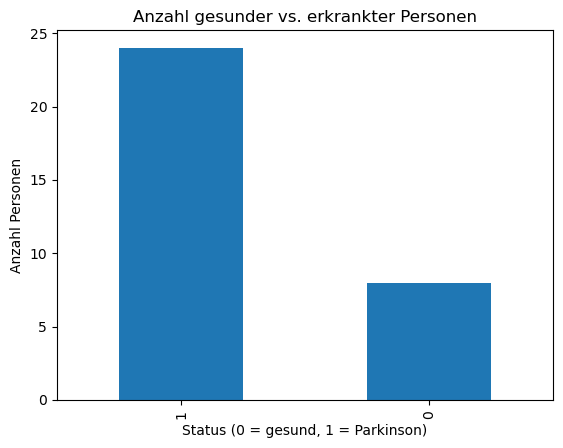

In [627]:
count.plot(kind='bar')
plt.title('Anzahl gesunder vs. erkrankter Personen')
plt.xlabel('Status (0 = gesund, 1 = Parkinson)')
plt.ylabel('Anzahl Personen')
plt.show()


In [628]:
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

### 2. Grundfrequenz (Pitch)

Der Datensatz enthält 3 Messwerte die sich auf die Grundfrequenz beziehen:
- MDVP:Fo(Hz)
- MDVP:Fhi(Hz)
- MDVP:Flo(Hz) 

➡️ Zusammen beschreiben die drei Grundfrequenz-Merkmale (Durchschnitt, Minimum und Maximum): Pitch-Level und Pitch-Variabilität

**MDVP (Multidimensional Voice Program):**
ist eine computergestützte Software zur objektiven akustischen Analyse der Stimmqualität


#### MDVP:Fo(Hz)
= Herz 

- Durchschnittliche Grundfrequenz (Pitch)
- Entspricht der wahrgenommenen Tonhöhe
- Parkinson-Patient:innen zeigen oft instabilere Pitch-Werte

In [629]:
lagemasse(df["MDVP:Fo(Hz)"])

,min,Q1,median,mean,mode,Q3,max
MDVP:Fo(Hz),88.333,117.572,148.79,154.228641,88.333,182.769,260.105


Die durchschnittliche Grundfrequenz (MDVP:Fo) weist einen Wertebereich von 88.3 Hz bis 260.1 Hz auf. Der Median liegt bei 148.8 Hz, während der Mittelwert mit 154.2 Hz leicht darüber liegt, was auf eine moderate Rechtsschiefe der Verteilung hindeutet. Die mittleren 50 % der Werte befinden sich zwischen dem ersten Quartil bei 117.6 Hz und dem dritten Quartil bei 182.8 Hz.

In [630]:
streumasse(df["MDVP:Fo(Hz)"])

,range,IQR,variance,std_dev,skewness,kurtosis
MDVP:Fo(Hz),171.772,65.197,1713.13746,41.390065,0.591737,-0.627898


Die Spannweite der durchschnittlichen Grundfrequenz beträgt 171.8 Hz, was auf eine hohe Variabilität hinweist. Der Interquartilsabstand von 65.2 Hz zeigt, dass auch die mittleren 50 % der Werte deutlich streuen. Die Standardabweichung liegt bei 41.4 Hz und bestätigt die ausgeprägte Streuung um den Mittelwert. Die positive Schiefe (0.59) weist auf eine leicht rechtsschiefe Verteilung hin, während die negative Kurtosis (−0.63) auf eine flachere Verteilungsform ohne ausgeprägte Ausreißer hindeutet.

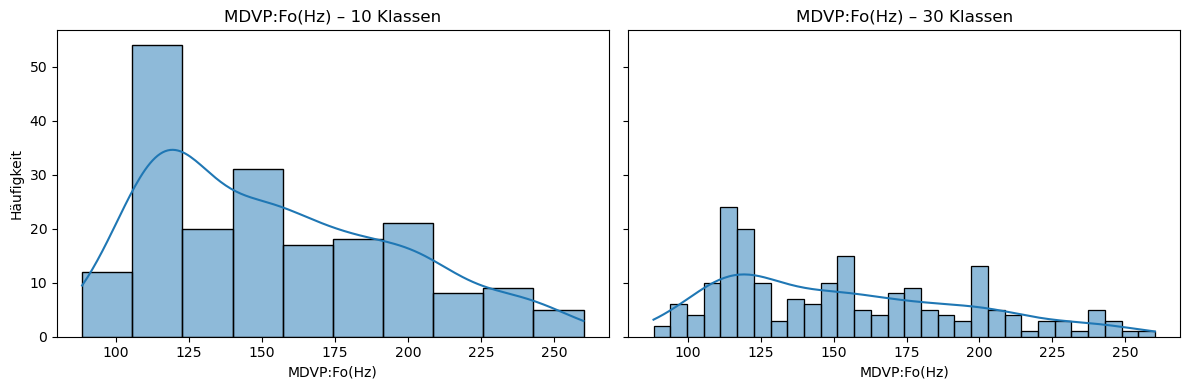

In [631]:
plot_histogram_comparison(df, 'MDVP:Fo(Hz)', 10, 30)

#### MDVP:Fhi(Hz)
= Herz
- Maximale Grundfrequenz
- Zeigt die obere Spannweite der Stimme

In [632]:
lagemasse(df["MDVP:Fhi(Hz)"])

,min,Q1,median,mean,mode,Q3,max
MDVP:Fhi(Hz),102.145,134.8625,175.829,197.104918,102.145,224.2055,592.03


Die maximale Grundfrequenz (MDVP:Fhi) weist einen sehr breiten Wertebereich von 102.1 Hz bis 592.0 Hz auf. Der Median liegt bei 175.8 Hz, während der Mittelwert mit 197.1 Hz deutlich höher ausfällt, was auf eine ausgeprägte Rechtsschiefe der Verteilung hindeutet. Die mittleren 50 % der Werte befinden sich zwischen dem ersten Quartil bei 134.9 Hz und dem dritten Quartil bei 224.2 Hz. Insgesamt deuten die Lagemaße auf eine hohe Variabilität der maximalen Grundfrequenz hin, wobei insbesondere einzelne sehr hohe Werte den Mittelwert nach oben verschieben.

In [633]:
streumasse(df["MDVP:Fhi(Hz)"])

,range,IQR,variance,std_dev,skewness,kurtosis
MDVP:Fhi(Hz),489.885,89.343,8370.703289,91.491548,2.542146,7.627241


Die maximale Grundfrequenz weist mit einer Spannweite von 489.9 Hz eine sehr hohe Streuung auf, was auf ausgeprägte individuelle Unterschiede hinweist. Der IQR beträgt 89.3 Hz und zeigt, dass bereits die mittleren 50 % der Werte stark variieren. Die Standardabweichung von 91.5 Hz bestätigt diese hohe Variabilität um den Mittelwert. Die stark positive Schiefe (2.54) deutet auf eine ausgeprägt rechtsschiefe Verteilung hin, während die hohe Kurtosis (7.63) auf eine starke Ausreißerlastigkeit mit einzelnen extrem hohen Werten schließen lässt.

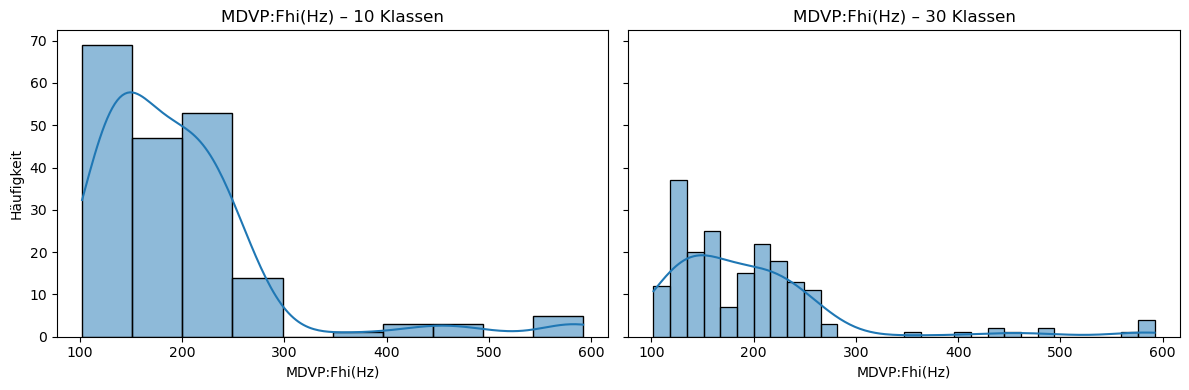

In [634]:
plot_histogram_comparison(df, 'MDVP:Fhi(Hz)', 10, 30)

#### MDVP:Flo(Hz)
= Herz
- Minimale Grundfrequenz
- Zeigt die untere Spannweite

In [635]:
lagemasse(df["MDVP:Flo(Hz)"])

,min,Q1,median,mean,mode,Q3,max
MDVP:Flo(Hz),65.476,84.291,104.315,116.324631,65.476,140.0185,239.17


Die minimale Grundfrequenz (MDVP:Flo) liegt in einem Wertebereich von 65.5 Hz bis 239.2 Hz. Der Median beträgt 104.3 Hz, während der Mittelwert mit 116.3 Hz darüber liegt, was auf eine rechtsschiefe Verteilung hindeutet. Die mittleren 50 % der Werte befinden sich zwischen dem ersten Quartil bei 84.3 Hz und dem dritten Quartil bei 140.0 Hz. Insgesamt zeigen die Lagemaße eine breite Verteilung der minimalen Grundfrequenz, wobei höhere Einzelwerte den Mittelwert nach oben verschieben.

In [636]:
streumasse(df["MDVP:Flo(Hz)"])

,range,IQR,variance,std_dev,skewness,kurtosis
MDVP:Flo(Hz),173.694,55.7275,1894.113405,43.521413,1.21735,0.654615


Die minimale Grundfrequenz weist mit einer Spannweite von 173.7 Hz eine ausgeprägte Streuung auf. Der Interquartilsabstand von 55.7 Hz zeigt, dass auch die mittleren 50 % der Werte deutlich variieren. Die Standardabweichung beträgt 43.5 Hz und bestätigt eine hohe Streuung um den Mittelwert. Die positive Schiefe (1.22) deutet auf eine rechtsschiefe Verteilung hin, während die leicht positive Kurtosis (0.65) auf eine moderat ausreißerlastige Verteilungsform schließen lässt.

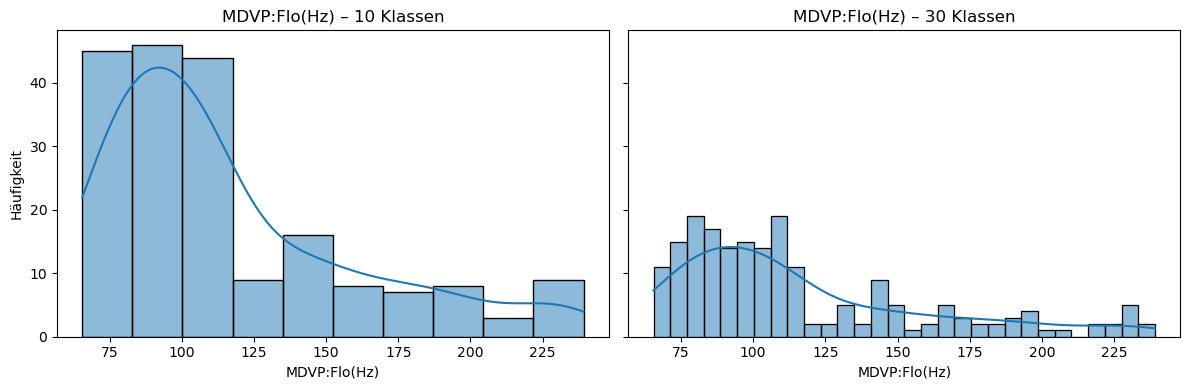

In [637]:
plot_histogram_comparison(df, 'MDVP:Flo(Hz)', 10, 30)

### 3. Jitter – Frequenzinstabilität

Der Datensatz enhält 5 Messwerte die sich auf den Jitter beziehen:
- MDVP:Jitter(%)
- MDVP:Jitter(Abs)
- MDVP:RAP
- MDVP:PPQ
- Jitter:DDP

Jitter misst minimale Schwankungen der Tonhöhe von Periode zu Periode.
Hoher Jitter bedeutet eine unregelmäßige Stimmlippenschwingung oder anders formuliert: Ein hoher Jitter-Wert weist auf eine instabile Stimme hin. Das bedeutet Menschen mit Parkinson können einen höheren Jitter.

Während Jitter (Abs) die absolute zeitliche Schwankung der Periodendauer beschreibt, erfasst Jitter (%) diese Schwankung relativ zur mittleren Periodendauer und ermöglicht dadurch eine bessere Vergleichbarkeit zwischen Sprecher:innen.



#### MDVP:Jitter(%)
= Prozent
- Relative Schwankung der Grundfrequenz
- Normiert und dadurch gut vergleichbar

In [638]:
lagemasse(df["MDVP:Jitter(%)"])

,min,Q1,median,mean,mode,Q3,max
MDVP:Jitter(%),0.00168,0.00346,0.00494,0.00622,0.00369,0.007365,0.03316


Der relative Jitter (MDVP:Jitter(%)) weist überwiegend niedrige Werte auf, mit einem Median von 0,494 % und einem Mittelwert von 0,622 %. Der Mittelwert liegt deutlich über dem Median, was auf eine ausgeprägte Rechtsschiefe der Verteilung hindeutet. Die mittleren 50 % der Werte befinden sich zwischen dem ersten Quartil bei 0,346 % und dem dritten Quartil bei 0,737 %. Das Maximum von 3,316 % liegt deutlich oberhalb dieses Bereichs und deutet auf einzelne Aufnahmen mit stark erhöhter Stimminstabilität hin.

In [639]:
streumasse(df["MDVP:Jitter(%)"])

,range,IQR,variance,std_dev,skewness,kurtosis
MDVP:Jitter(%),0.03148,0.003905,0.000024,0.004848,3.084946,12.030939


Die Spannweite des relativen Jitters beträgt 3,148 %, während der Interquartilsabstand mit 0,391 % vergleichsweise klein ist, was auf eine dichte Konzentration der meisten Werte im unteren Bereich hindeutet. Die Standardabweichung von 0,485 % zeigt dennoch eine relevante Streuung um den Mittelwert. Die stark positive Schiefe (3,08) und die hohe Kurtosis (12,03) weisen auf eine stark rechtsschiefe, ausreißerlastige Verteilung mit wenigen extrem hohen Jitter-Werten hin.

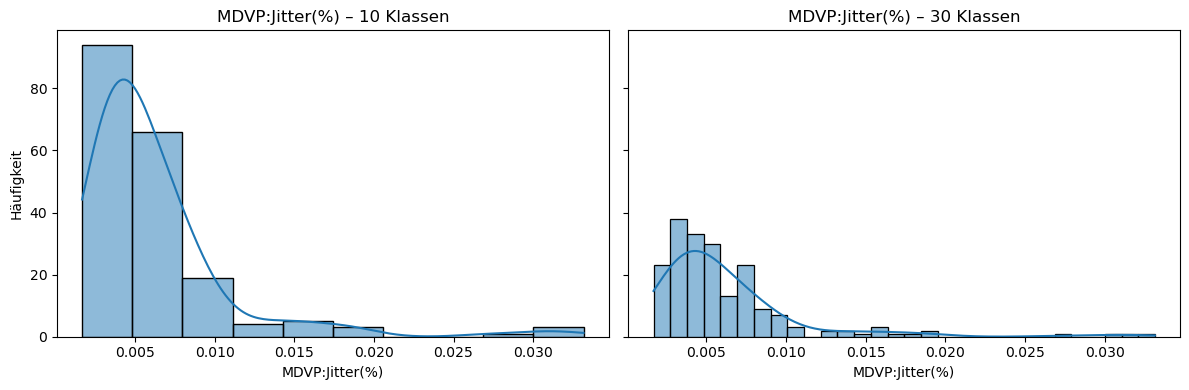

In [640]:
plot_histogram_comparison(df, 'MDVP:Jitter(%)', 10, 30)

#### MDVP:Jitter(Abs)
= Sekunden

- Absolute Schwankung
- Stärker von der Grundfrequenz abhängig

In [641]:
lagemasse(df["MDVP:Jitter(Abs)"])

,min,Q1,median,mean,mode,Q3,max
MDVP:Jitter(Abs),0.000007,0.00002,0.00003,0.000044,0.00003,0.00006,0.00026


Der absolute Jitter (MDVP:Jitter(Abs)) weist insgesamt sehr kleine Werte auf. Der Median liegt bei 0.00003 Sekunden, während der Mittelwert mit 0.000044 Sekunden etwas höher ausfällt. Diese Differenz deutet auf eine rechtsschiefe Verteilung hin. Die mittleren 50 % der Werte befinden sich zwischen 0.00002 und 0.00006 Sekunden, während das Maximum von 0.00026 Sekunden auf einzelne Aufnahmen mit deutlich erhöhter Stimminstabilität hinweist.

In [642]:
streumasse(df["MDVP:Jitter(Abs)"])

,range,IQR,variance,std_dev,skewness,kurtosis
MDVP:Jitter(Abs),0.000253,0.00004,1.212565e-09,0.000035,2.649071,10.869043


Die Spannweite des absoluten Jitters beträgt 0.000253 Sekunden, während der Interquartilsabstand mit 0.00004 Sekunden vergleichsweise klein ist, was auf eine starke Konzentration der meisten Werte im unteren Bereich hinweist. Die Standardabweichung von 0.000035 Sekunden zeigt dennoch eine messbare Streuung um den Mittelwert. Die deutlich positive Schiefe (2.65) und die hohe Kurtosis (10.87) weisen auf eine stark rechtsschiefe, ausreißerlastige Verteilung hin, die durch wenige extrem hohe Jitter-Werte geprägt ist.

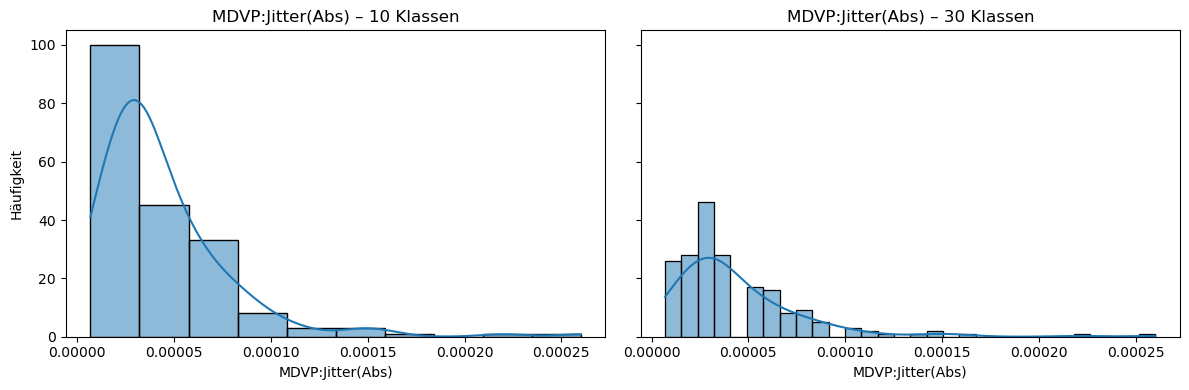

In [643]:
plot_histogram_comparison(df, 'MDVP:Jitter(Abs)', 10, 30)

#### MDVP:RAP: Relative Average Perturbation
= einheitslos

RAP ist ein quantitatives Maß zur Bewertung der Stimme bei einem gehaltenen Vokal. Es ist eine der vielen Methoden zur Messung von Frequenz-Perturbationen. RAP reduziert die Auswirkungen langsamer Veränderungen der Grundfrequenz (F0 bzw. Fx), indem es über drei aufeinanderfolgende Schwingungszyklen mittelt, um eine Schätzung des mittleren Periodenwerts zu liefern, wie er ohne Perturbation (Störung) vorgelegen hätte (bekannt als „korrigierter“ Periodenwert). Der Jitter für einen gegebenen Zyklus wird dann als die Differenz zwischen diesem korrigierten Periodenwert und dem tatsächlichen Periodenwert definiert. Es wird angenommen, dass RAP ein **zuverlässigeres Maß für die intrinsische Stabilität der Stimme** darstellt als andere Jitter-Maße [9].

Jitter (RAP) ist definiert als die Relative Average Perturbation. Er beschreibt die durchschnittliche absolute Differenz zwischen einer Periodendauer und dem Mittelwert aus dieser Periode sowie ihren beiden benachbarten Perioden, normiert durch die durchschnittliche Periodendauer [8].





In [644]:
lagemasse(df["MDVP:RAP"])

,min,Q1,median,mean,mode,Q3,max
MDVP:RAP,0.00068,0.00166,0.0025,0.003306,0.00169,0.003835,0.02144


Das Maß MDVP:RAP (Relative Average Perturbation) weist überwiegend niedrige Werte auf, mit einem Median von 0.00250 und einem Mittelwert von 0.00331. Der Mittelwert liegt deutlich über dem Median, was auf eine ausgeprägte Rechtsschiefe der Verteilung hindeutet. Die mittleren 50 % der Werte liegen zwischen dem ersten Quartil bei 0.00166 und dem dritten Quartil bei 0.00384. Das Maximum von 0.02144 deutet auf einzelne Aufnahmen mit stark erhöhter kurzfristiger Frequenzinstabilität hin.

In [645]:
streumasse(df["MDVP:RAP"])

,range,IQR,variance,std_dev,skewness,kurtosis
MDVP:RAP,0.02076,0.002175,0.000009,0.002968,3.360708,14.213798


Die Spannweite von MDVP:RAP beträgt 0.02076, während der Interquartilsabstand mit 0.00218 vergleichsweise gering ist, was auf eine hohe Konzentration der meisten Werte im unteren Bereich hinweist. Die Standardabweichung von 0.00297 bestätigt dennoch eine relevante Streuung um den Mittelwert. Die stark positive Schiefe (3.36) und die sehr hohe Kurtosis (14.21) weisen auf eine ausgeprägt rechtsschiefe und ausreißerlastige Verteilung hin, die durch wenige extreme RAP-Werte geprägt ist.

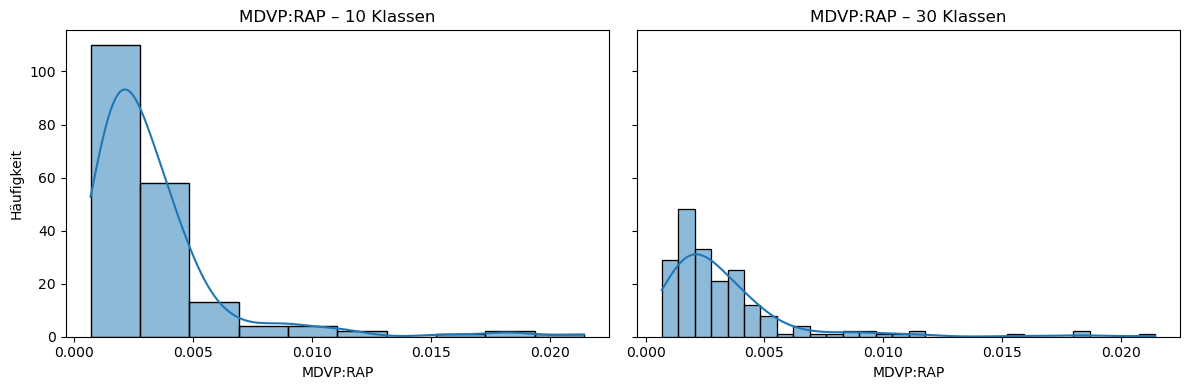

In [646]:
plot_histogram_comparison(df, 'MDVP:RAP', 10, 30)

#### MDVP:PPQ
= einheitslos

Jitter (PPQ5) ist der Five-Point Period Perturbation Quotient. Er wird berechnet als die durchschnittliche absolute Differenz zwischen einer Periodendauer und dem Mittelwert aus dieser Periode sowie ihren vier nächstgelegenen Nachbarperioden, geteilt durch die durchschnittliche Periodendauer [8].

In [647]:
lagemasse(df["MDVP:PPQ"])

,min,Q1,median,mean,mode,Q3,max
MDVP:PPQ,0.00092,0.00186,0.00269,0.003446,0.00332,0.003955,0.01958


Das Maß MDVP:PPQ (Five-Point Period Perturbation Quotient) weist überwiegend niedrige Werte auf. Der Median liegt bei 0.00269, während der Mittelwert mit 0.00345 darüber liegt, was auf eine deutlich rechtsschiefe Verteilung hindeutet. Die mittleren 50 % der Werte befinden sich zwischen dem ersten Quartil bei 0.00186 und dem dritten Quartil bei 0.00396. Das Maximum von 0.01958 weist auf einzelne Aufnahmen mit stark erhöhter periodischer Instabilität der Grundfrequenz hin.

In [648]:
streumasse(df["MDVP:PPQ"])

,range,IQR,variance,std_dev,skewness,kurtosis
MDVP:PPQ,0.01866,0.002095,0.000008,0.002759,3.073892,11.963922


Die Spannweite von MDVP:PPQ beträgt 0.01866, während der Interquartilsabstand mit 0.00210 vergleichsweise gering ist, was auf eine starke Konzentration der meisten Werte im unteren Bereich hinweist. Die Standardabweichung von 0.00276 bestätigt dennoch eine relevante Streuung um den Mittelwert. Die stark positive Schiefe (3.07) sowie die hohe Kurtosis (11.96) deuten auf eine ausgeprägt rechtsschiefe und ausreißerlastige Verteilung hin, die durch wenige extreme PPQ-Werte geprägt ist.

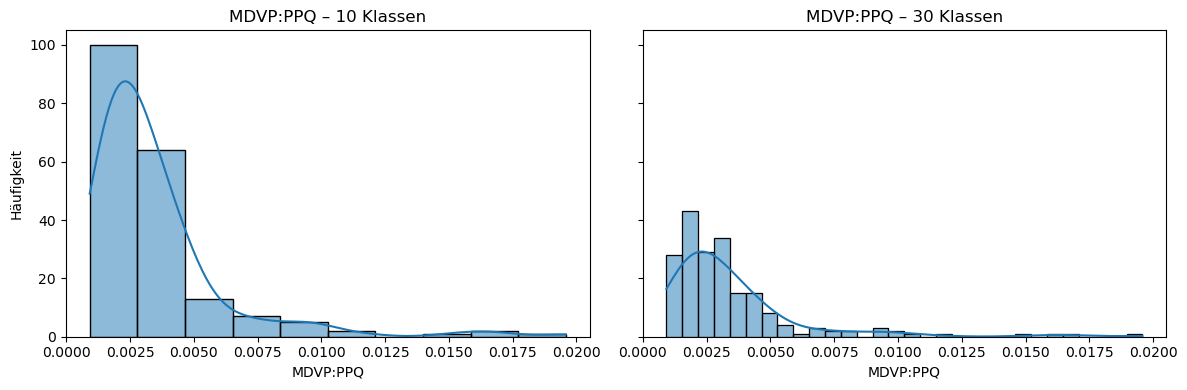

In [649]:
plot_histogram_comparison(df, 'MDVP:PPQ', 10, 30)

#### Jitter:DDP
= einheitslos

Jitter:DDP misst, wie stark sich die Abstände zwischen aufeinanderfolgenden Stimmschwingungen verändern. Je höher der Wert, desto unregelmäßiger und instabiler ist die Stimme [10].

In [650]:
lagemasse(df["Jitter:DDP"])

,min,Q1,median,mean,mode,Q3,max
Jitter:DDP,0.00204,0.004985,0.00749,0.00992,0.00507,0.011505,0.06433


Das Maß Jitter:DDP weist überwiegend niedrige Werte auf, mit einem Median von 0.00749 und einem Mittelwert von 0.00992. Der Mittelwert liegt deutlich über dem Median, was auf eine ausgeprägte Rechtsschiefe der Verteilung hindeutet. Die mittleren 50 % der Werte liegen zwischen dem ersten Quartil bei 0.00499 und dem dritten Quartil bei 0.01151. Das Maximum von 0.06433 weist auf einzelne Aufnahmen mit stark erhöhter kurzfristiger Frequenzinstabilität hin.

In [651]:
streumasse(df["Jitter:DDP"])

,range,IQR,variance,std_dev,skewness,kurtosis
Jitter:DDP,0.06229,0.00652,0.000079,0.008903,3.362058,14.224762


Die Spannweite von Jitter:DDP beträgt 0.06229, während der Interquartilsabstand mit 0.00652 vergleichsweise gering ist, was auf eine starke Konzentration der meisten Werte im unteren Bereich hindeutet. Die Standardabweichung von 0.00890 bestätigt dennoch eine relevante Streuung um den Mittelwert. Die stark positive Schiefe (3.36) sowie die sehr hohe Kurtosis (14.22) deuten auf eine ausgeprägt rechtsschiefe und ausreißerlastige Verteilung hin, die durch wenige extreme DDP-Werte geprägt ist.

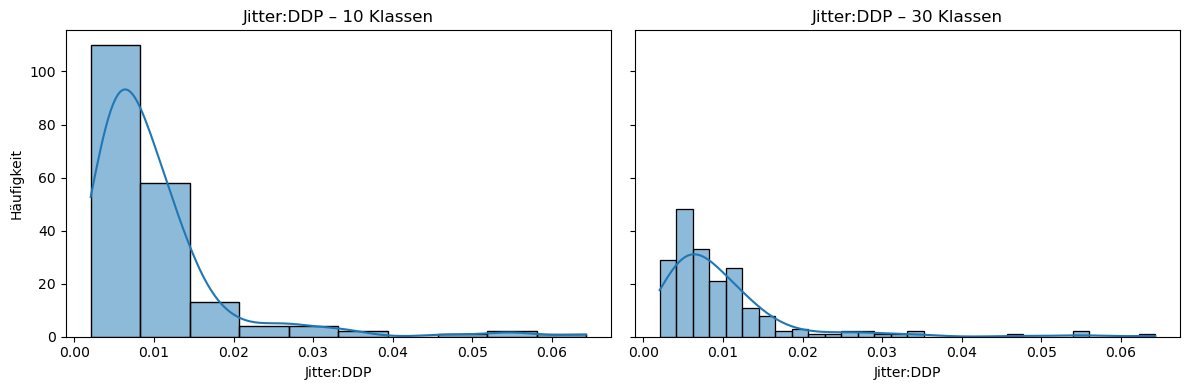

In [652]:
plot_histogram_comparison(df, 'Jitter:DDP', 10, 30)

### 4. Shimmer – Amplitudeninstabilität

Shimmer beschreibt die kurzfristige Variation der Amplitude (Lautstärke) der Stimme von einer Schwingungsperiode zur nächsten und dient als Maß für die Stabilität der Stimmlippenschwingung. Je höher der Shimmer-Wert, desto instabiler ist die Amplitudenentwicklung der Stimme [11].

➡️ Erhöhte Shimmer-Werte deuten auf eingeschränkte Stimmkontrolle hin.

#### MDVP:Shimmer
= Prozent

Shimmer (local) ist definiert als die durchschnittliche absolute Differenz zwischen den Amplituden aufeinanderfolgender Perioden, dividiert durch die mittlere Amplitude.
Dieses Maß wird von MDVP als Shim bezeichnet. Werte oberhalb von 3,81 % gelten als Hinweis auf eine pathologische Stimmproduktion [12].

In [653]:
variable = "MDVP:Shimmer"

In [654]:
lagemasse(df[variable])

,min,Q1,median,mean,mode,Q3,max
MDVP:Shimmer,0.00954,0.016505,0.02297,0.029709,0.0145,0.037885,0.11908


Das Maß MDVP:Shimmer, welches die relative Amplitudenvariation der Stimme beschreibt, weist überwiegend moderate Werte auf. Der Median beträgt 2,30 %, während der Mittelwert mit 2,97 % höher liegt, was auf eine rechtsschiefe Verteilung hindeutet. Die mittleren 50 % der Werte liegen zwischen 1,65 % (erstes Quartil) und 3,79 % (drittes Quartil). Das Maximum von 11,91 % deutet auf einzelne Aufnahmen mit stark erhöhter Amplitudeninstabilität hin, die auf eine pathologische Stimmproduktion schließen lassen können.

In [655]:
streumasse(df[variable])

,range,IQR,variance,std_dev,skewness,kurtosis
MDVP:Shimmer,0.10954,0.02138,0.000356,0.018857,1.66648,3.238308


Die Spannweite von MDVP:Shimmer beträgt 10,95 %, was auf eine deutliche Differenz zwischen minimalen und maximalen Amplitudenvariationen hinweist. Der Interquartilsabstand liegt bei 2,14 %, was zeigt, dass sich die mittleren 50 % der Werte in einem vergleichsweise engen Bereich konzentrieren. Die Standardabweichung von 1,89 % weist dennoch auf eine relevante Streuung um den Mittelwert hin. Die positive Schiefe (1,67) deutet auf eine rechtsschiefe Verteilung hin, während die erhöhte Kurtosis (3,24) auf eine leicht ausgeprägte Ausreißerlastigkeit mit einzelnen stark erhöhten Shimmer-Werten schließen lässt.

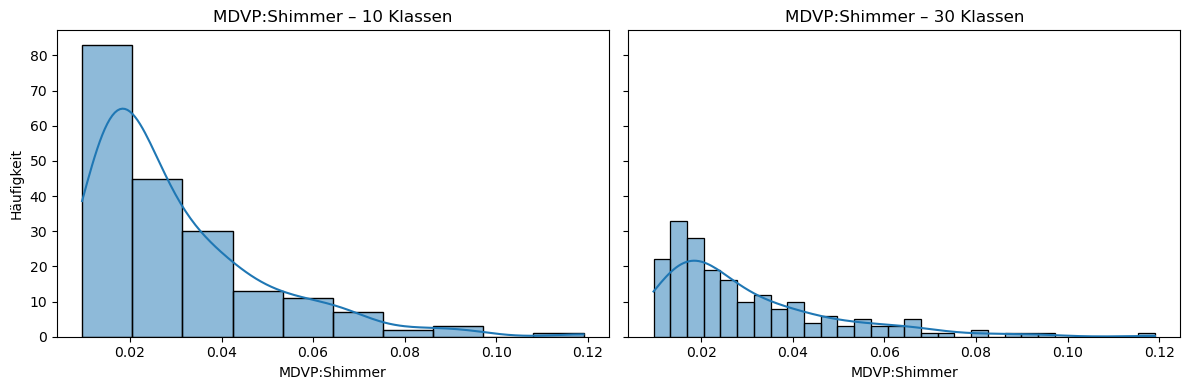

In [656]:
plot_histogram_comparison(df, variable, 10, 30)

#### MDVP:Shimmer(dB)
= Dezibel

Dieses Maß berechnet die durchschnittliche absolute logarithmische Differenz (Basis 10) zwischen den Amplituden aufeinanderfolgender Perioden und multipliziert das Ergebnis mit 20, sodass der Wert in Dezibel (dB) vorliegt.
MDVP bezeichnet dieses Maß als ShdB und gibt 0,35 dB als Schwellenwert für Pathologie an [12].


In [657]:
variable = "MDVP:Shimmer(dB)"

In [658]:
lagemasse(df[variable])

,min,Q1,median,mean,mode,Q3,max
MDVP:Shimmer(dB),0.085,0.1485,0.221,0.282251,0.154,0.35,1.302


Das Maß MDVP:Shimmer(dB), zeigt überwiegend niedrige Werte. Der Median beträgt 0,221 dB, während der Mittelwert mit 0,282 dB höher liegt, was auf eine rechtsschiefe Verteilung hindeutet. Die mittleren 50 % der Werte befinden sich zwischen 0,149 dB (erstes Quartil) und 0,350 dB (drittes Quartil). Das Maximum von 1,302 dB liegt deutlich oberhalb dieses Bereichs und weist auf einzelne Aufnahmen mit stark erhöhter Amplitudeninstabilität hin.

In [659]:
streumasse(df[variable])

,range,IQR,variance,std_dev,skewness,kurtosis
MDVP:Shimmer(dB),1.217,0.2015,0.037977,0.194877,1.999389,5.128193


Die Spannweite von MDVP:Shimmer(dB) beträgt 1,217 dB, was auf deutliche Unterschiede in der Amplitudenvariation zwischen den einzelnen Aufnahmen hinweist. Der Interquartilsabstand liegt bei 0,202 dB, was zeigt, dass sich die mittleren 50 % der Werte in einem vergleichsweise engen Bereich konzentrieren. Die Standardabweichung von 0,195 dB weist dennoch auf eine relevante Streuung um den Mittelwert hin. Die positive Schiefe (2,00) deutet auf eine rechtsschiefe Verteilung hin, während die erhöhte Kurtosis (5,13) auf eine ausreißerlastige Verteilung mit einzelnen stark erhöhten Shimmer(dB)-Werten schließen lässt.

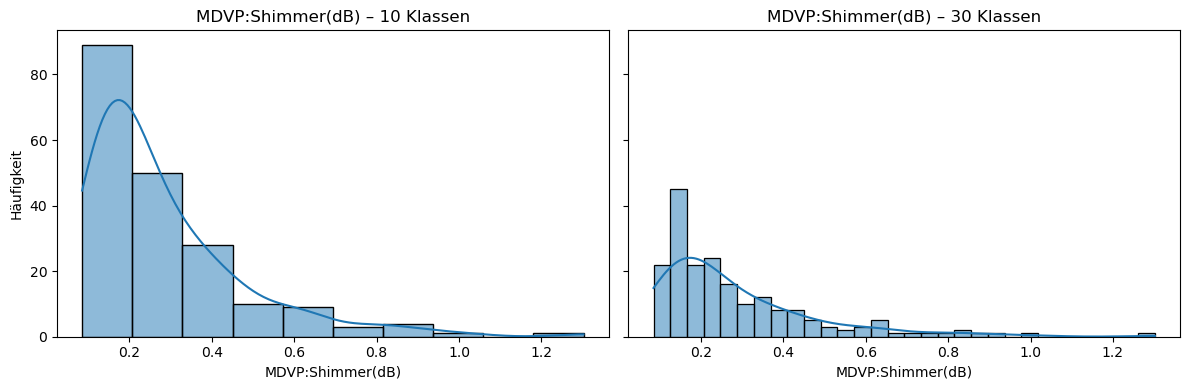

In [660]:
plot_histogram_comparison(df, variable, 10, 30)

#### Shimmer:APQ3, Shimmer:APQ5

= einheitslos

**Shimmer:APQ3**
Der Three-Point Amplitude Perturbation Quotient misst die durchschnittliche absolute Differenz zwischen der Amplitude einer Periode und dem Mittelwert der Amplituden ihrer zwei benachbarten Perioden, normiert durch die mittlere Amplitude.
Durch die Mittelung über drei Perioden ist APQ3 robuster gegenüber kurzfristigem Rauschen.

**Shimmer:APQ5**
Der Five-Point Amplitude Perturbation Quotient erweitert dieses Prinzip auf fünf Perioden. Er misst die durchschnittliche Abweichung der Amplitude einer Periode vom Mittelwert aus ihr selbst und ihren vier nächsten Nachbarperioden, relativ zur mittleren Amplitude.
APQ5 ist robuster als APQ3 und glättet kurzfristige Ausreißer stärker [12].


In [661]:
variable = "Shimmer:APQ3"

In [662]:
lagemasse(df[variable])

,min,Q1,median,mean,mode,Q3,max
Shimmer:APQ3,0.00455,0.008245,0.01279,0.015664,0.00469,0.020265,0.05647


In [663]:
streumasse(df[variable])

,range,IQR,variance,std_dev,skewness,kurtosis
Shimmer:APQ3,0.05192,0.01202,0.000103,0.010153,1.580576,2.720152


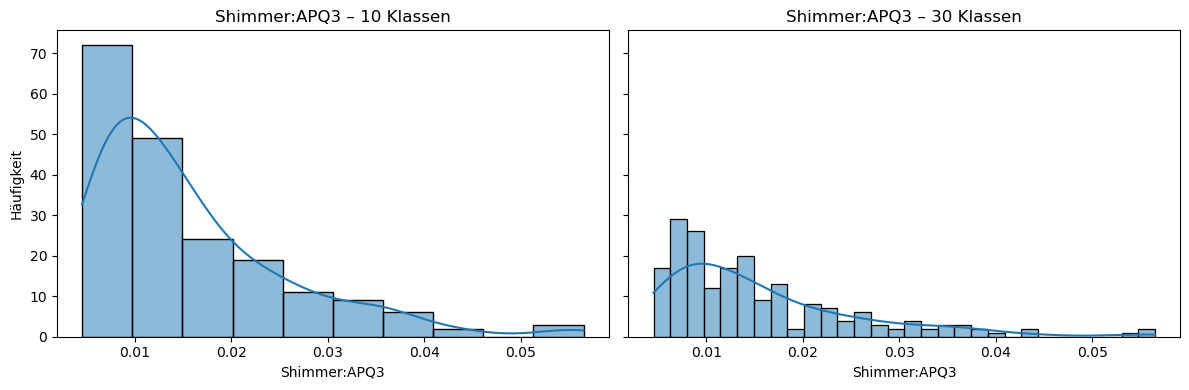

In [664]:
plot_histogram_comparison(df, variable, 10, 30)

Das Maß Shimmer:APQ3, weist überwiegend niedrige bis moderate Werte auf. Der Median liegt bei 0,01279, während der Mittelwert mit 0,01566 höher ausfällt, was auf eine rechtsschiefe Verteilung hindeutet. Die mittleren 50 % der Werte befinden sich zwischen 0,00825 und 0,02027. Das Maximum von 0,05647 deutet auf einzelne Aufnahmen mit deutlich erhöhter Amplitudeninstabilität hin. Die Streuungsmaße zeigen mit einer Spannweite von 0,05192 und einer Standardabweichung von 0,01015 eine moderate Streuung. Die positive Schiefe (1,58) sowie die erhöhte Kurtosis (2,72) weisen auf eine leicht ausreißerlastige Verteilung hin.

In [665]:
variable = "Shimmer:APQ5"

In [666]:
lagemasse(df[variable])

,min,Q1,median,mean,mode,Q3,max
Shimmer:APQ5,0.0057,0.00958,0.01347,0.017878,0.00747,0.02238,0.0794


In [667]:
streumasse(df[variable])

,range,IQR,variance,std_dev,skewness,kurtosis
Shimmer:APQ5,0.0737,0.0128,0.000145,0.012024,1.798697,3.87421


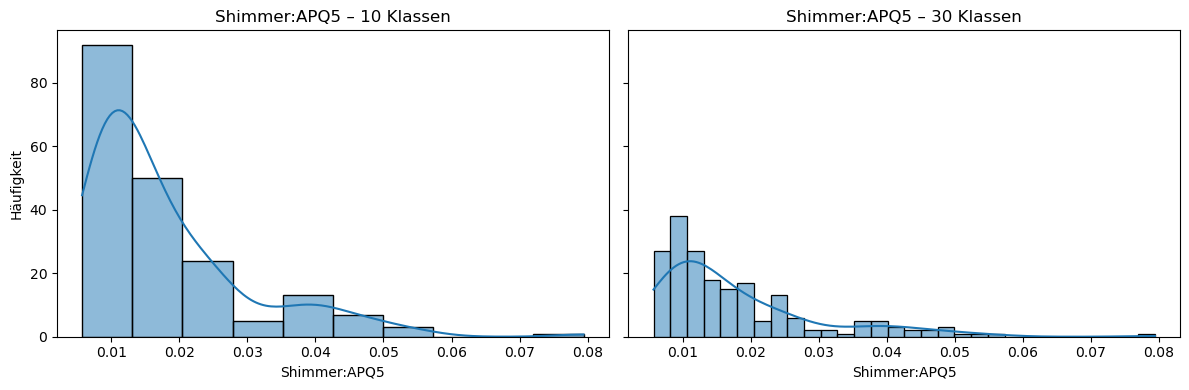

In [668]:
plot_histogram_comparison(df, variable, 10, 30)

Shimmer:APQ5 misst die Amplitudenvariation über fünf aufeinanderfolgende Perioden und stellt damit ein robusteres Maß als APQ3 dar. Der Median beträgt 0,01347, während der Mittelwert bei 0,01788 liegt, was ebenfalls auf eine rechtsschiefe Verteilung hindeutet. Die mittleren 50 % der Werte liegen zwischen 0,00958 und 0,02238. Das Maximum von 0,07940 weist auf einzelne Aufnahmen mit stark erhöhter Amplitudeninstabilität hin. Mit einer Spannweite von 0,07370 und einer Standardabweichung von 0,01202 zeigt APQ5 eine etwas größere Streuung als APQ3. Die positive Schiefe (1,80) und die erhöhte Kurtosis (3,87) deuten auf eine ausreißerlastige Verteilung mit wenigen extremen Werten hin.

#### MDVP:APQ
= einheitslos

APQ11 verwendet ein Fenster von elf Perioden und stellt damit das am stärksten geglättete Shimmer-Maß dar.
MDVP bezeichnet dieses Maß als APQ und nennt 3,07 % als Schwellenwert für pathologische Stimmen [12].

In [669]:
variable = "MDVP:APQ"

In [670]:
lagemasse(df[variable])

,min,Q1,median,mean,mode,Q3,max
MDVP:APQ,0.00719,0.01308,0.01826,0.024081,0.00903,0.0294,0.13778


Das Maß MDVP:APQ,weist überwiegend niedrige bis moderate Werte auf. Der Median liegt bei 0,01826, während der Mittelwert mit 0,02408 deutlich höher ausfällt, was auf eine ausgeprägte Rechtsschiefe der Verteilung hindeutet. Die mittleren 50 % der Werte befinden sich zwischen 0,01308 (erstes Quartil) und 0,02940 (drittes Quartil). Das Maximum von 0,13778 liegt deutlich über diesem Bereich und deutet auf einzelne Aufnahmen mit stark erhöhter Amplitudeninstabilität hin.

In [671]:
streumasse(df[variable])

,range,IQR,variance,std_dev,skewness,kurtosis
MDVP:APQ,0.13059,0.01632,0.000287,0.016947,2.618047,11.163288


Die Streuungsmaße zeigen mit einer Spannweite von 0,13059 und einer Standardabweichung von 0,01695 eine relevante Variabilität. Die stark positive Schiefe (2,62) sowie die sehr hohe Kurtosis (11,16) weisen auf eine stark rechtsschiefe und ausreißerlastige Verteilung hin, die durch wenige extreme APQ-Werte geprägt ist.

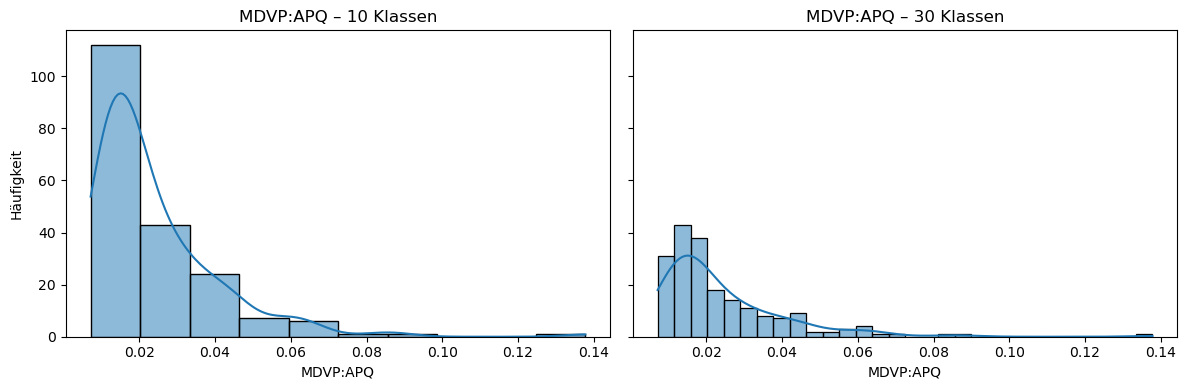

In [672]:
plot_histogram_comparison(df, variable, 10, 30)

#### Shimmer:DDA
= einheitslos

Shimmer (DDP) ist definiert als die durchschnittliche absolute Differenz der Differenzen zwischen den Amplituden aufeinanderfolgender Perioden.
Dieses Maß entspricht dem Dreifachen von APQ3 und betont besonders kurzfristige Amplitudenunregelmäßigkeiten. Es ist Praats ursprüngliche Definition von Shimmer [12].

In [673]:
variable = "Shimmer:DDA"

In [674]:
lagemasse(df[variable])

,min,Q1,median,mean,mode,Q3,max
Shimmer:DDA,0.01364,0.024735,0.03836,0.046993,0.01567,0.060795,0.16942


Das Maß Shimmer:DDA, weist überwiegend moderate Werte auf. Der Median liegt bei 0,03836, während der Mittelwert mit 0,04699 höher ausfällt, was auf eine rechtsschiefe Verteilung hindeutet. Die mittleren 50 % der Werte befinden sich zwischen 0,02474 (erstes Quartil) und 0,06080 (drittes Quartil). Das Maximum von 0,16942 liegt deutlich über diesem Bereich und deutet auf einzelne Aufnahmen mit stark erhöhter Amplitudeninstabilität hin.

In [675]:
streumasse(df[variable])

,range,IQR,variance,std_dev,skewness,kurtosis
Shimmer:DDA,0.15578,0.03606,0.000928,0.030459,1.580618,2.720661


Die Streuungsmaße zeigen mit einer Spannweite von 0,15578 und einer Standardabweichung von 0,03046 eine moderate Streuung um den Mittelwert. Die positive Schiefe (1,58) sowie die erhöhte Kurtosis (2,72) weisen auf eine leicht ausreißerlastige Verteilung mit einzelnen extremen DDA-Werten hin.

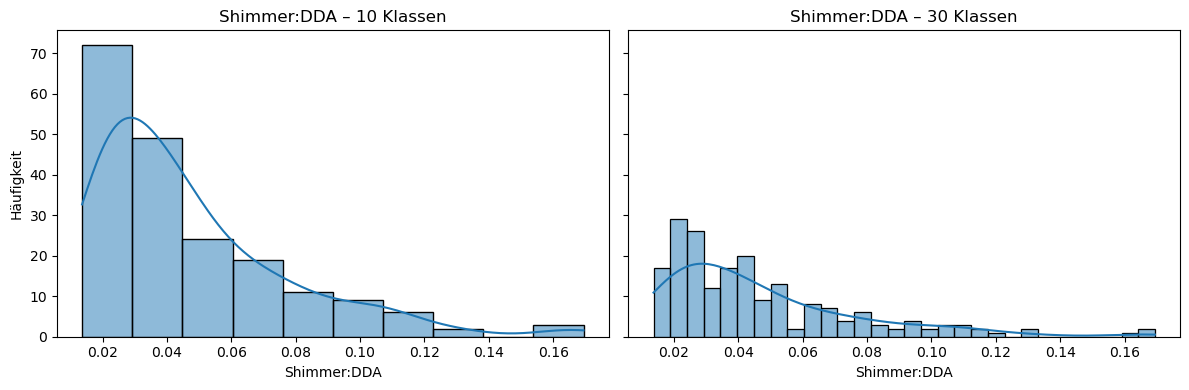

In [676]:
plot_histogram_comparison(df, variable, 10, 30)

### 5. Rauschmaße

Diese Merkmale beschreiben das Verhältnis von harmonischem Klang zu Rauschen.

#### NHR (Noise-to-Harmonics Ratio)

= linearer Quotient

Erhöhte NHR-Werte weisen auf einen erhöhten Rauschanteil im Sprachsignal hin und gelten als Indikator für eine reduzierte Stimmqualität, wie sie typischerweise bei pathologischen Stimmen, unter anderem bei Parkinson-bedingter Dysphonie, beobachtet wird.

➡️ Je höher, desto verrauschter die Stimme


In [677]:
variable = "NHR"

In [678]:
lagemasse(df[variable])

,min,Q1,median,mean,mode,Q3,max
NHR,0.00065,0.005925,0.01166,0.024847,0.00231,0.02564,0.31482


Das Maß NHR (Noise-to-Harmonics Ratio), weist überwiegend sehr niedrige Werte auf. Der Median liegt bei 0,01166, während der Mittelwert mit 0,02485 höher ausfällt. Diese Differenz deutet auf eine stark rechtsschiefe Verteilung hin. Die mittleren 50 % der Werte befinden sich zwischen 0,00593 (erstes Quartil) und 0,02564 (drittes Quartil). Das Maximum von 0,31482 liegt weit über diesem Bereich und weist auf einzelne Aufnahmen mit einem stark erhöhten Rauschanteil in der Stimme hin.

In [679]:
streumasse(df[variable])

,range,IQR,variance,std_dev,skewness,kurtosis
NHR,0.31417,0.019715,0.001634,0.040418,4.220709,21.994974


Die Spannweite von NHR beträgt 0,31417, während der Interquartilsabstand mit 0,01972 vergleichsweise klein ist, was auf eine hohe Konzentration der meisten Werte im unteren Bereich hindeutet. Die Standardabweichung von 0,04042 zeigt jedoch eine relevante Streuung um den Mittelwert. Die sehr stark positive Schiefe (4,22) sowie die extrem hohe Kurtosis (21,99) deuten auf eine ausgeprägt rechtsschiefe und stark ausreißerlastige Verteilung hin, die durch wenige extrem hohe NHR-Werte geprägt ist.

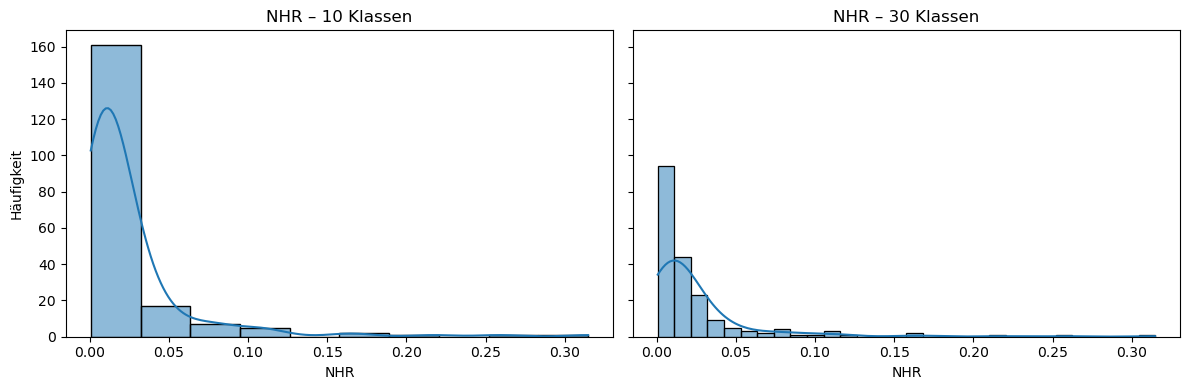

In [680]:
plot_histogram_comparison(df, variable, 10, 30)


#### HNR (Harmonics-to-Noise Ratio)

= logarithmisch in Dezibel (dB)

Die Harmonics-to-Noise Ratio (HNR) beschreibt das Verhältnis zwischen periodischen Signalanteilen und Rauschen und dient als Maß für die akustische Periodizität sowie die Stimmqualität [13].

Je höher, desto klarer die Stimme

➡️ Parkinson-Stimmen zeigen oft: höheres NHR und niedrigeres HNR

In [681]:
variable = "HNR"

In [682]:
lagemasse(df[variable])

,min,Q1,median,mean,mode,Q3,max
HNR,8.441,19.198,22.085,21.885974,8.441,25.0755,33.047


Die HNR weist einen Median von 22.09 dB und einen sehr ähnlichen Mittelwert von 21.89 dB auf, was auf eine insgesamt ausgewogene Verteilung ohne starken Einfluss extremer Ausreißer hindeutet. Die mittleren 50 % der Werte liegen zwischen 19.20 dB (Q1) und 25.08 dB (Q3). Der minimale Wert von 8.44 dB deutet jedoch auf einzelne Aufnahmen mit stark erhöhtem Rauschanteil und somit eingeschränkter Stimmqualität hin.

In [683]:
streumasse(df[variable])

,range,IQR,variance,std_dev,skewness,kurtosis
HNR,24.606,5.8775,19.587389,4.425764,-0.514317,0.616036


Die Spannweite von 24.61 dB zeigt eine relevante Gesamtstreuung, während der Interquartilsabstand von 5.88 dB auf eine moderate Variabilität im zentralen Bereich hinweist. Die leicht negative Schiefe (-0.51) bedeutet, dass niedrige HNR-Werte etwas stärker ausgeprägt sind als hohe, was zu Stimmen mit reduzierter Harmonie passt. Die Kurtosis von 0.62 liegt nahe bei der Normalverteilung und spricht gegen eine stark ausreißerlastige Verteilung.

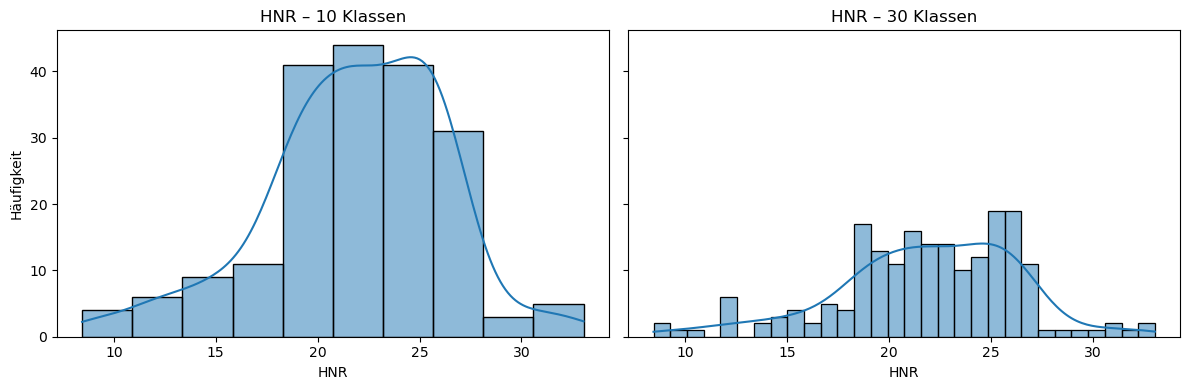

In [684]:
plot_histogram_comparison(df, variable, 10, 30)

### 6. Nichtlineare & komplexe Dynamik

Diese Merkmale erfassen feinere zeitliche Strukturen, die lineare Maße nicht abbilden können.

➡️ Diese Features sind besonders nützlich für Machine Learning, da sie nicht-triviale Muster erfassen.

#### RPDE (Recurrence Period Density Entropy)

= Misst die Unregelmäßigkeit der Schwingungsperioden

ist ein nichtlineares Maß, das die Regelmäßigkeit bzw. Unregelmäßigkeit der Schwingungsperioden eines Sprachsignals beschreibt. Es quantifiziert, wie vorhersagbar die Perioden der Grundfrequenz über die Zeit sind.

**Niedriger RPDE-Wert**
- sehr regelmäßige, stabile Stimmperioden
- typisch für gesunde Stimmen

**Hoher RPDE-Wert**
- unregelmäßige, komplexe Periodenstruktur
- typisch für pathologische Stimmen, z. B. bei Parkinson-Dysphonie


In [685]:
variable = "RPDE"

In [686]:
lagemasse(df[variable])

,min,Q1,median,mean,mode,Q3,max
RPDE,0.25657,0.421306,0.495954,0.498536,0.25657,0.587562,0.685151


Die RPDE-Werte weisen einen Median von 0.496 und einen sehr ähnlichen Mittelwert von 0.499 auf, was auf eine nahezu symmetrische Verteilung der Werte hindeutet. Die mittleren 50 % der Beobachtungen liegen zwischen 0.421 (Q1) und 0.588 (Q3).

In [687]:
streumasse(df[variable])

,range,IQR,variance,std_dev,skewness,kurtosis
RPDE,0.428581,0.166256,0.010804,0.103942,-0.143402,-0.921781


Die Spannweite von 0.429 zeigt eine merkliche Variabilität zwischen den Aufnahmen, während der Interquartilsabstand von 0.166 auf eine moderate Streuung im zentralen Bereich hinweist. Die leicht negative Schiefe (−0.14) deutet auf eine geringfügige Häufung höherer RPDE-Werte hin, was mit der Präsenz pathologischer Stimmen vereinbar ist. Die negative Kurtosis (−0.92) spricht für eine eher flache Verteilung ohne ausgeprägte Ausreißer.

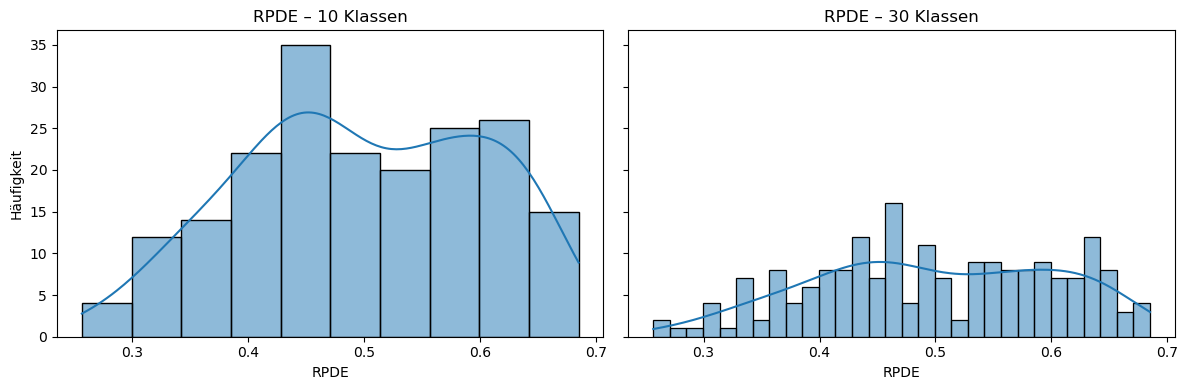

In [688]:
plot_histogram_comparison(df, variable, 10, 30)

#### DFA: Detrended Fluctuation Analysis

Der DFA-Wert ist ein fraktaler Skalierungsexponent, der beschreibt, wie stark Langzeitkorrelationen in einem Signal vorhanden sind. Er gibt an, wie stabil bzw. selbstähnlich ein Signal über verschiedene Zeitskalen hinweg ist.

**Niedriger DFA-Wert (~0.5)**
- eher zufällige, rauschähnliche Struktur
- geringere Langzeitkorrelation

**Höherer DFA-Wert (>0.7)**
- starke Langzeitkorrelation
- komplexere, weniger stabile Stimmstruktur
- häufig bei pathologischen Stimmen


In [689]:
variable = "DFA"

In [690]:
lagemasse(df[variable])

,min,Q1,median,mean,mode,Q3,max
DFA,0.574282,0.674758,0.722254,0.718099,0.574282,0.761881,0.825288


Die DFA-Werte weisen einen Median von 0.722 und einen sehr ähnlichen Mittelwert von 0.718 auf, was auf eine annähernd symmetrische Verteilung der Werte hindeutet. Die mittleren 50 % der Beobachtungen liegen zwischen 0.675 (Q1) und 0.762 (Q3).  Der minimale Wert von 0.574 deutet auf Stimmen mit vergleichsweise geringeren Langzeitabhängigkeiten hin, während der maximale Wert von 0.825 eine stark korrelierte, weniger stabile Signalstruktur widerspiegelt.

In [691]:
streumasse(df[variable])

,range,IQR,variance,std_dev,skewness,kurtosis
DFA,0.251006,0.087124,0.003062,0.055336,-0.033214,-0.686152


Die Spannweite von 0.251 zeigt eine moderate Gesamtstreuung, während der Interquartilsabstand von 0.087 auf eine relativ kompakte Verteilung im zentralen Bereich hinweist. Die nahezu symmetrische Verteilung wird durch die sehr geringe Schiefe (−0.03) bestätigt. Die negative Kurtosis (−0.69) spricht für eine flachere Verteilung ohne ausgeprägte Ausreißer.

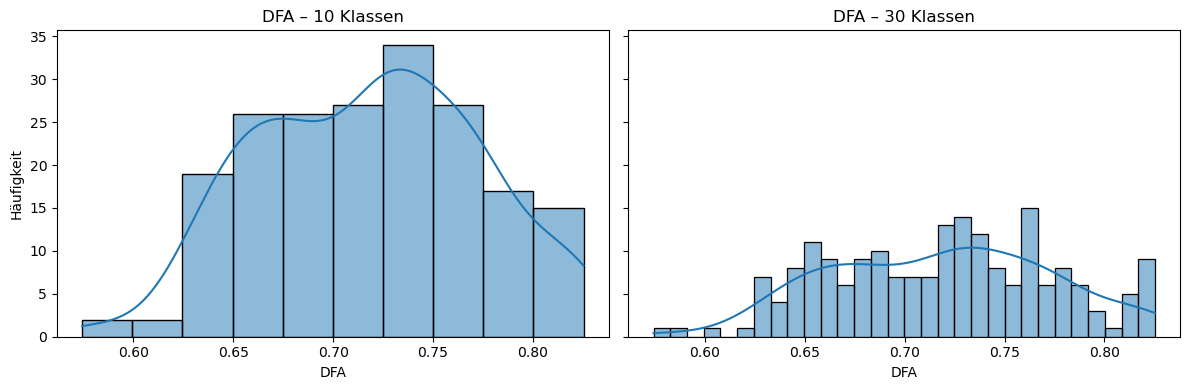

In [692]:
plot_histogram_comparison(df, variable, 10, 30)

#### D2

D2 steht für die Korrelationsdimension (Correlation Dimension).

Die Korrelationsdimension ist ein nichtlineares Maß der dynamischen Komplexität eines Signals. Sie beschreibt, wie viele Freiheitsgrade das zugrunde liegende dynamische System besitzt und wie komplex die zeitliche Struktur des Signals ist.

Im Kontext von Sprachsignalen bedeutet ein höherer D2-Wert:
- komplexere, weniger deterministische Schwingungsdynamik
- erhöhte Unregelmäßigkeit der Stimmlippenbewegung

**Niedrige D2-Werte**
- einfachere, stabilere Dynamik
- typisch für gesunde Stimmen

**Höhere D2-Werte**
- komplexere, chaotischere Dynamik
- häufig bei pathologischen Stimmen, z. B. bei Parkinson

In [693]:
variable = "D2"

In [694]:
lagemasse(df[variable])

,min,Q1,median,mean,mode,Q3,max
D2,1.423287,2.099125,2.361532,2.381826,1.423287,2.636456,3.671155


Die Korrelationsdimension D2 weist einen Median von 2.36 und einen sehr ähnlichen Mittelwert von 2.38 auf, was auf eine relativ symmetrische Verteilung der Werte hindeutet.

In [695]:
streumasse(df[variable])

,range,IQR,variance,std_dev,skewness,kurtosis
D2,2.247868,0.53733,0.146535,0.382799,0.430384,0.220334


Die Spannweite von 2.25 verdeutlicht eine relevante Variabilität zwischen den Aufnahmen, während der Interquartilsabstand von 0.54 auf eine mäßige Streuung im zentralen Bereich hinweist. Die leicht positive Schiefe (0.43) deutet auf eine geringfügige Häufung höherer D2-Werte hin, was mit der Präsenz pathologischer Stimmen vereinbar ist. Die niedrige Kurtosis (0.22) spricht gegen eine stark ausreißerlastige Verteilung.

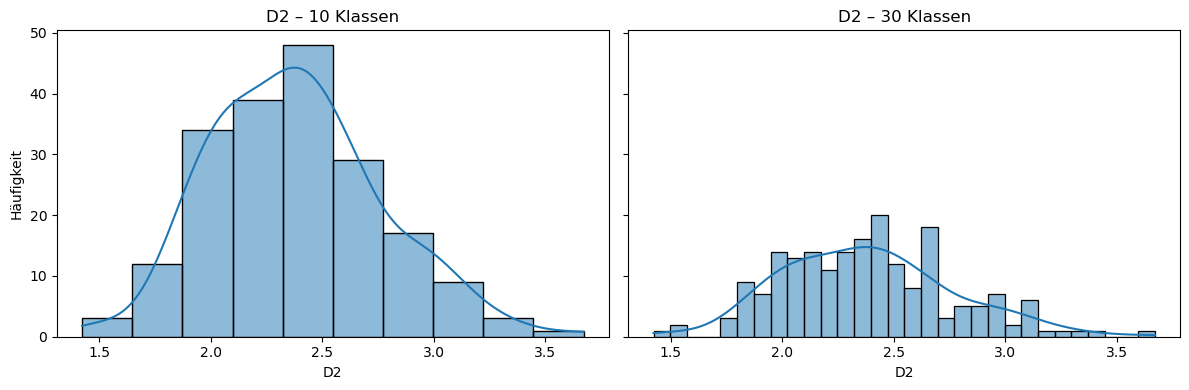

In [696]:
plot_histogram_comparison(df, variable, 10, 30)

#### PPE

PPE steht für Pitch Period Entropy.

PPE ist ein nichtlineares Maß, das die Unvorhersagbarkeit und Unregelmäßigkeit der Tonhöhenperioden eines Sprachsignals quantifiziert. Es misst, wie stark die Perioden der Grundfrequenz variieren und wie wenig vorhersehbar deren zeitliche Struktur ist.

m Gegensatz zu klassischen Jitter-Maßen ist PPE robuster gegenüber langsamen Tonhöhenänderungen und erfasst insbesondere irreguläre, nichtperiodische Schwankungen der Stimme.

**Niedriger PPE-Wert**
- regelmäßige, gut vorhersagbare Tonhöhenperioden
- typisch für gesunde Stimmen

**Hoher PPE-Wert**
- stark unregelmäßige, schwer vorhersagbare Tonhöhenstruktur
- charakteristisch für pathologische Stimmen

In [697]:
variable = "PPE"

In [698]:
lagemasse(df[variable])

,min,Q1,median,mean,mode,Q3,max
PPE,0.044539,0.137451,0.194052,0.206552,0.044539,0.25298,0.527367


Die PPE-Werte weisen einen Median von 0.194 und einen etwas höheren Mittelwert von 0.207 auf, was auf eine leicht rechtsschiefe Verteilung hindeutet. Die mittleren 50 % der Beobachtungen liegen zwischen 0.137 (Q1) und 0.253 (Q3), was auf eine moderate Unvorhersagbarkeit der Tonhöhenperioden in den meisten Aufnahmen schließen lässt. Der minimale Wert von 0.045 steht für sehr regelmäßige, gut kontrollierte Stimmperioden, während der maximale Wert von 0.527 auf einzelne Aufnahmen mit stark erhöhter periodischer Unregelmäßigkeit hinweist.

In [699]:
streumasse(df[variable])

,range,IQR,variance,std_dev,skewness,kurtosis
PPE,0.482828,0.115529,0.008121,0.090119,0.797491,0.528335


Die Spannweite von 0.483 zeigt eine deutliche Variabilität zwischen den Aufnahmen, während der Interquartilsabstand von 0.116 auf eine vergleichsweise kompakte Verteilung im zentralen Bereich hindeutet. Die positive Schiefe (0.80) deutet auf eine Häufung höherer PPE-Werte hin, was mit der Präsenz pathologischer Stimmen vereinbar ist. Die moderate Kurtosis (0.53) spricht für eine leicht ausreißerbetonte, jedoch nicht extrem verzerrte Verteilung.

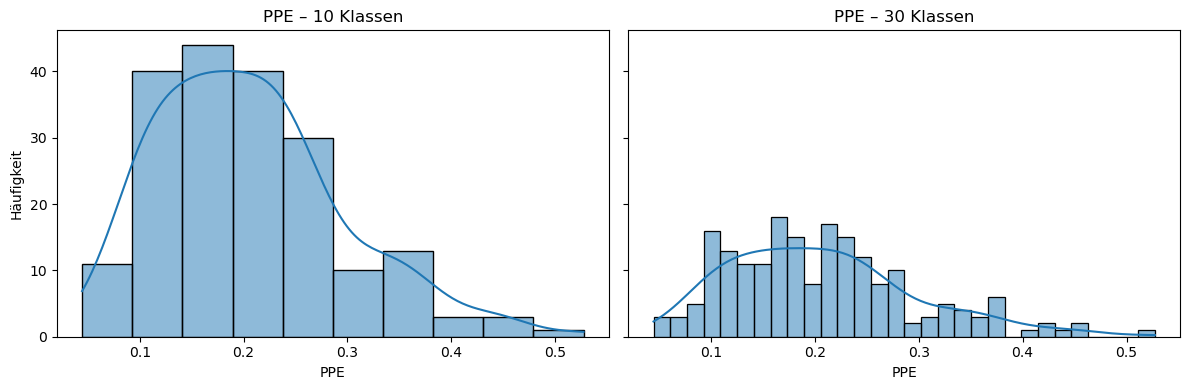

In [700]:
plot_histogram_comparison(df, variable, 10, 30)

#### spread1, spread2

spread1 und spread2 sind nichtlineare Maße, die aus der Verteilung der Grundfrequenz (Pitch) abgeleitet werden. Sie beschreiben die Form und Streuung der Pitch-Variation eines Sprachsignals.

**spread1**

= quantifiziert die Breite und Lage der Pitch-Verteilung

- ist stark sensitiv gegenüber asymmetrischen und instabilen Tonhöhenmustern
- nimmt häufig negative Werte an, da es logarithmisch transformiert ist

**spread2**

= ergänzt spread1 um Informationen zur Form der Verteilung

- beschreibt feinere Unterschiede in der Pitch-Streuung

- reagiert weniger stark auf extreme Ausreißer

In [701]:
variable = "spread1"

In [702]:
lagemasse(df[variable])

,min,Q1,median,mean,mode,Q3,max
spread1,-7.964984,-6.450096,-5.720868,-5.684397,-7.964984,-5.046192,-2.434031


In [703]:
streumasse(df[variable])

,range,IQR,variance,std_dev,skewness,kurtosis
spread1,5.530953,1.403904,1.188553,1.090208,0.432139,-0.050199


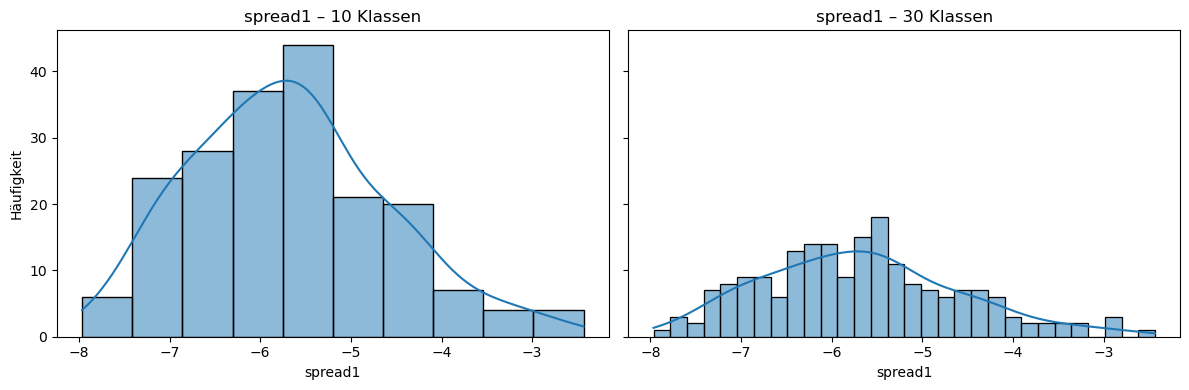

In [704]:
plot_histogram_comparison(df, variable, 10, 30)

Die Variable spread1 weist durchgehend negative Werte auf, mit einem Median von −5.72 und einem Mittelwert von −5.68, was auf eine logarithmisch transformierte Pitch-Verteilung hinweist. Die mittleren 50 % der Werte liegen zwischen −6.45 (Q1) und −5.05 (Q3) und zeigen damit eine moderate Streuung der Grundfrequenzverteilung im zentralen Bereich. Der minimale Wert von −7.96 steht für sehr kompakte, wenig variable Pitch-Strukturen, während der maximale Wert von −2.43 auf einzelne Aufnahmen mit deutlich breiterer und instabilerer Pitch-Verteilung hinweist. Die leicht positive Schiefe (0.43) deutet auf eine geringfügige Häufung höherer (weniger negativer) Werte hin, während die nahezu neutrale Kurtosis (−0.05) gegen eine stark ausreißerlastige Verteilung spricht.

In [705]:
variable = "spread2"

In [706]:
lagemasse(df[variable])

,min,Q1,median,mean,mode,Q3,max
spread2,0.006274,0.174351,0.218885,0.22651,0.210279,0.279234,0.450493


In [707]:
streumasse(df[variable])

,range,IQR,variance,std_dev,skewness,kurtosis
spread2,0.444219,0.104883,0.006957,0.083406,0.14443,-0.083023


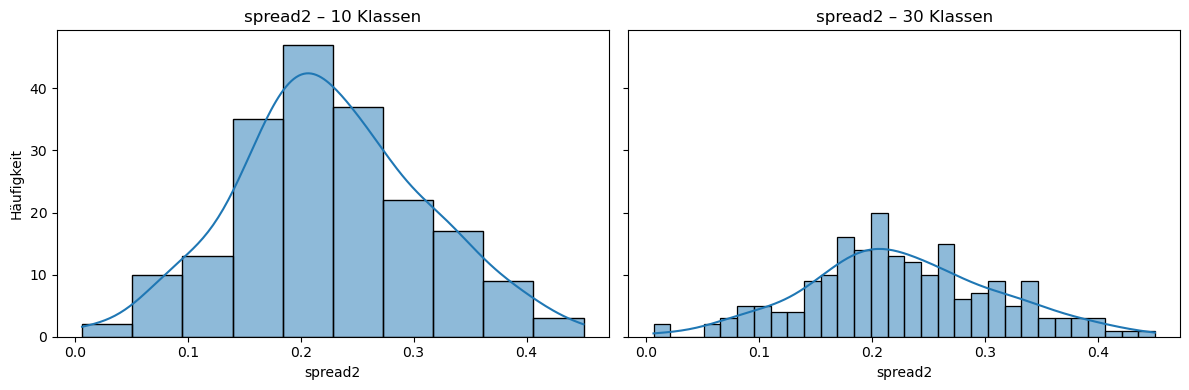

In [708]:
plot_histogram_comparison(df, variable, 10, 30)

Die Variable spread2 besitzt ausschließlich positive Werte und weist einen Median von 0.219 sowie einen Mittelwert von 0.227 auf, was auf eine insgesamt moderate Streuung der Pitch-Verteilung hindeutet. Die mittleren 50 % der Beobachtungen liegen zwischen 0.174 (Q1) und 0.279 (Q3), was auf relativ homogene Unterschiede im zentralen Bereich schließen lässt. Der minimale Wert von 0.006 beschreibt sehr kompakte, gleichmäßige Tonhöhenverteilungen, während der maximale Wert von 0.450 auf einzelne Aufnahmen mit deutlich erhöhter Pitch-Streuung hinweist. Die geringe positive Schiefe (0.14) sowie die leicht negative Kurtosis (−0.08) sprechen für eine nahezu symmetrische, wenig ausreißerbehaftete Verteilung.

## 4.4 Bivariate analyse

### 1. Pearson Korrelation aller numerischen Features

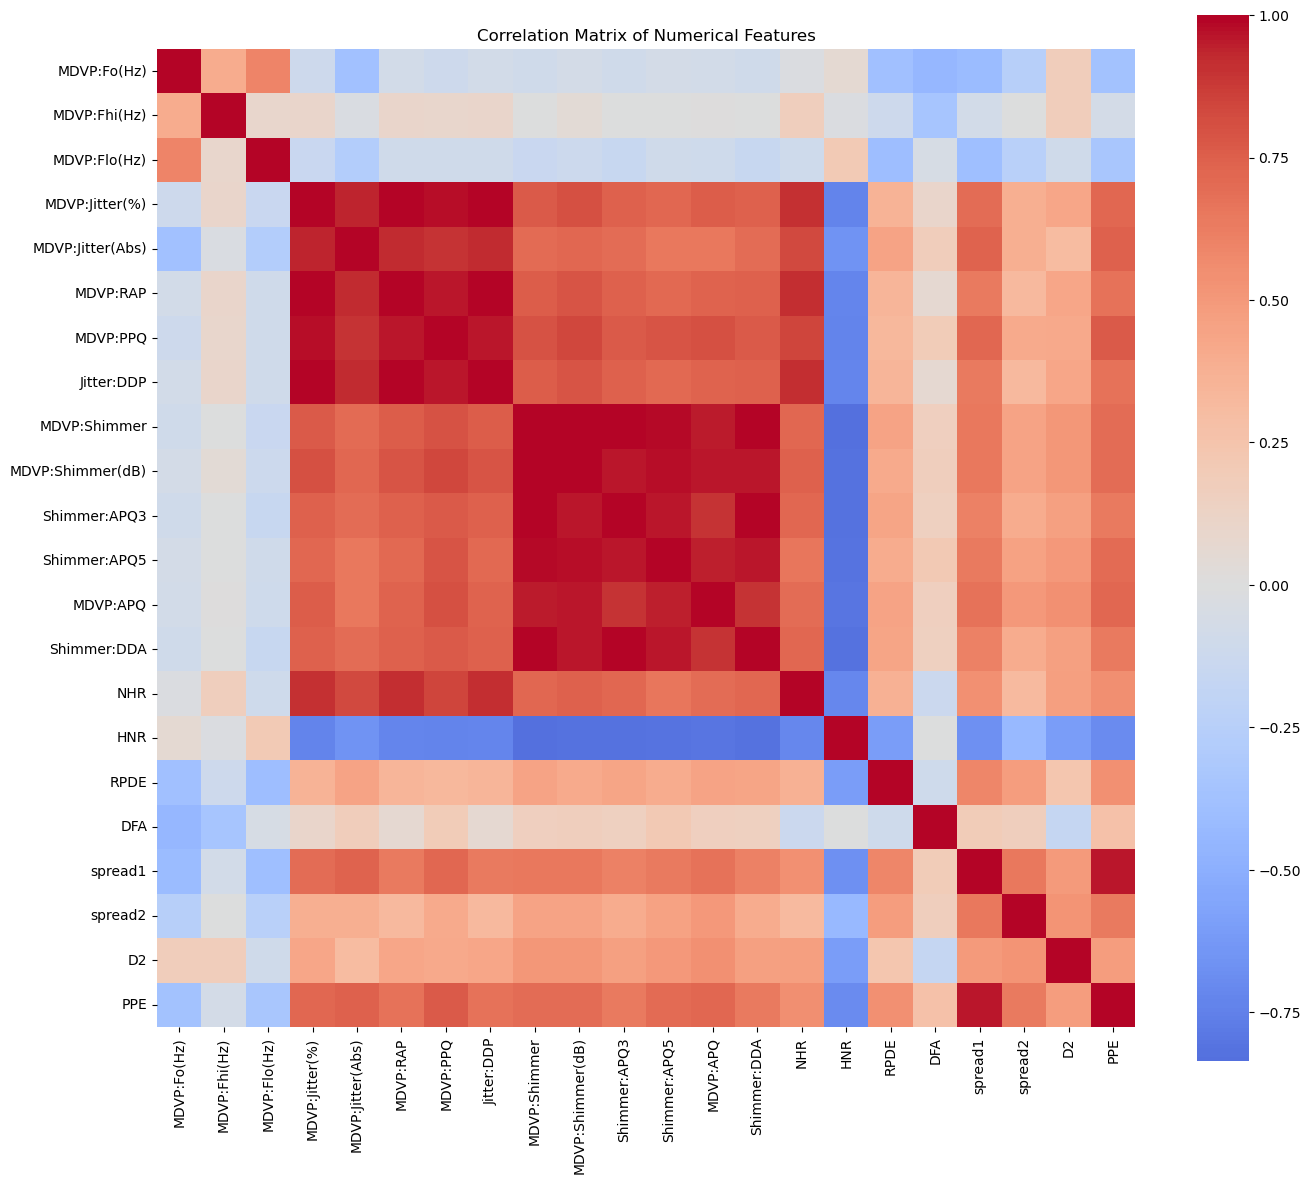

In [709]:
corr_matrix = df[feature_cols].corr(method='pearson')

plt.figure(figsize=(14, 12))
sns.heatmap(
    corr_matrix,
    annot=False,      # besser lesbar bei vielen Features
    cmap='coolwarm',
    center=0,
    square=True
)
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()

Es zeigen sich deutlich erkennbare Feature-Gruppen bzw, Cluster:

1. **Jitter-Cluster** (MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP): Alle Variablen beschreiben die Instabilität der Grundfrequenz und unterscheiden sich nur im Berechnungsfenster bzw. Glättungsgrad
2. **Shimmer-Cluster** (MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA: Alle Variablen messen die  Amplitudeninstabilität und zeigen ein ähnliches Verhalten. 

Diese Variablen haben eine sehr stark positive korrelation und scheinen alle dassselbe Grundphänomen zu beschreibung und sind dadurch redundant in diesem Datensatz. Dies macht eine Featrue-Reduktion sinnvoll. 

**Zusammenhang zwischen den Jitter- und Shimmer-Maße:** Dies deutet darauf hin, das instabile Frequenz und instabilie Ampliture zusammen auftreten.

**Spiegelbildlicher Effekt bei NHR und HNR:** HNR korreliert stark negativ mit Jitter, Shimmer und NHR und NHR korreliert stark positiv mit Jitter- und Shimmer-Maße. Dies kann bedeuten: je instabilder und verauschter die Stimme desto niedriger ist der HNR und desto höher ist der NHR. Für die Klassifikation scheint HNR ein sehr wichtiges Feature zu sein.

**Grundfrequenz-Maße (Fo, Fhi, Flo)**: Diese Maße korrelieren nur mäßig untereinander und eher schwach mit Jitter und Shimmer. Dies weißt darauf hin, dass die Pitch-Höhe und die Pitch-Stabilität relativ unabhänig voneinander sind. 

**Nichtlineare Features (RPDE, DFA, spread1, spread2, D2, PPE)**: Diese Features komplexe nicht lineare zusammenhänge, was sie wertvoll für die Klassifikation macht. 

### 2. Pearson-Korrelation von `status`und den numerischen Featrues

Die Pearson-Korrelation ist eigentlich nur für metrische Variablen zulässig. Allerdings stellt eine binär kategoriale Variable einen Sonderfall dar und ist ebenso zulässig

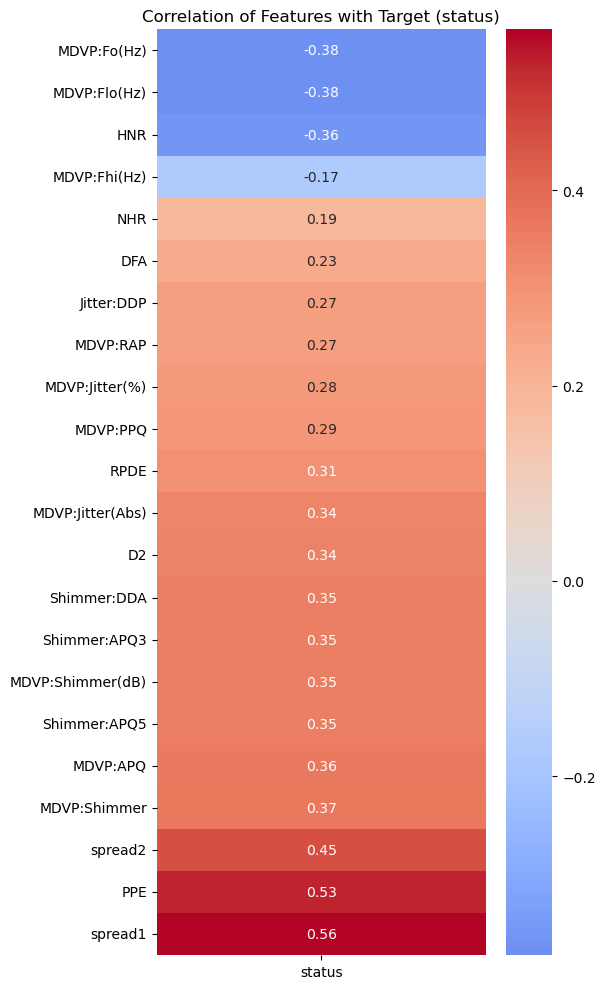

In [710]:
corr_with_target = (
    df[feature_cols + ['status']]
    .corr()['status']
    .drop('status')
    .sort_values()
)

plt.figure(figsize=(6, 10))
sns.heatmap(
    corr_with_target.to_frame(),
    annot=True,
    cmap='coolwarm',
    center=0
)
plt.title("Correlation of Features with Target (status)")
plt.tight_layout()
plt.show()

Es zeigen sich überwiegend moderate Zusammenhänge zwischen den akustischen Merkmalen und dem binären Krankheitsstatus. Insbesondere nichtlineare Merkmale wie spread1, spread2 und PPE weisen die stärksten Korrelationen auf (> 0,5), was darauf hindeutet, dass nichtlineare Stimm­dynamiken besonders aussagekräftig für die Erkennung der Parkinson-Krankheit sind. Klassische Perturbationsmaße (Jitter und Shimmer) zeigen ebenfalls konsistente moderate positive Korrelationen, während Maße der Harmonizität sowie der Grundfrequenz negativ mit dem Krankheitsstatus korrelieren.

# 5. Preporcessing 
Bei baumbasierten Modellen kann auf eine Skalierung der Merkmale verzichtet werden, da diese Modelle auf schwellenwertbasierte Aufteilungen beruhen. Für lineare Baseline-Modelle müssen die Merkmale hingegen mithilfe eines StandardScalers standardisiert werden, um vergleichbare Skalen der Eingangsvariablen sicherzustellen [14].

## 4.1. Train-Test-Split


In [711]:
X = df[feature_cols]
y = df['status']

# Train/Test Split (stratifiziert da es eine extrem hohe Class-Imbalance gibt)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# 6. Baseline-Modells

Zur Definition einer belastbaren Referenzleistung werden zunächst mehrere Baseline-Modelle unter Verwendung aller verfügbaren Merkmale trainiert. Alle Modelle werden in ihrem Default-Zustand angewendet, ohne eine explizite Anpassung der Hyperparameter vorzunehmen. Dadurch wird eine objektive Vergleichsbasis geschaffen, anhand derer der Einfluss nachfolgender Schritte wie der Feature Selection bewertet werden kann.

Folgende Modelle werden genutzt:

1. Logistic Regression
2. Random Forest Classifier
3. Gradient Boosting Classifier
4. Suport Vector Machine
5. k-NN Classifier

### Zusammenfassung

|  Rang | Modell                           | ROC-AUC (%) | PR-AUC (%) | Accuracy (%) | F1-Score (weighted, %) |
| ----: | -------------------------------- | ----------: | ---------: | -----------: | ---------------------: |
| **1** | **Random Forest**                |  **97.586** | **99.251** |   **94.872** |             **94.872** |
| **2** | **Support Vector Machine (SVM)** |      95.517 |     98.297 |       92.308 |                 91.818 |
| **3** | **k-NN Classifier**              |      95.517 |     98.297 |       92.308 |                 91.818 |
| **4** | **Logistic Regression**          |      92.414 |     97.202 |       92.308 |                 92.170 |
| **5** | **Gradient Boosting Classifier** |      96.897 |     99.056 |       89.744 |                 89.744 |

In [712]:

def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    classes = ["Gesund", "Krank"]
    group_names = ["TN", "FP", "FN", "TP"]
    group_counts = cm.flatten()

    labels = [f"{name}\n{count}" for name, count in zip(group_names, group_counts)]
    labels = np.array(labels).reshape(2, 2)

    # Plot
    plt.figure(figsize=(5, 4))
    sns.heatmap(
        cm,
        annot=labels,
        fmt="",
        cmap="Blues",
        xticklabels=classes,
        yticklabels=classes,
        cbar=False
    )

    plt.xlabel("Vorhergesagte Klasse")
    plt.ylabel("Wahre Klasse")
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.show()

In [713]:
def get_metrics(y_test, y_proba, y_pred):
    # ROC-AUC & PR-AUC (Anzeige in %)
    roc_auc = roc_auc_score(y_test, y_proba) * 100
    pr_auc = average_precision_score(y_test, y_proba) * 100
    report = classification_report(
    y_test,
    y_pred,
    output_dict=True,
    digits=3)

    # Classification_report
    report_df = pd.DataFrame(report).T

    for col in ["precision", "recall", "f1-score"]:
        report_df[col] = report_df[col] * 100

    print(f"ROC-AUC: {roc_auc:.3f}%")
    print(f"PR-AUC (Average Precision): {pr_auc:.3f}%")
    print("\nClassification Report (in %):\n")
    print(report_df.round(3))

## 6.1. Logistic Regression

In [714]:
lr_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=1000))
])

In [715]:

lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', LogisticRegression(max_iter=1000))])

In [716]:
y_pred_lr= lr_pipe.predict(X_test)
y_proba_lr= lr_pipe.predict_proba(X_test)[:, 1]

### Evaluation

In [717]:
get_metrics(y_test, y_proba_lr, y_pred_lr)

ROC-AUC: 92.414%
PR-AUC (Average Precision): 97.202%

Classification Report (in %):

              precision  recall  f1-score  support
0                88.889  80.000    84.211   10.000
1                93.333  96.552    94.915   29.000
accuracy         92.308  92.308    92.308    0.923
macro avg        91.111  88.276    89.563   39.000
weighted avg     92.194  92.308    92.170   39.000


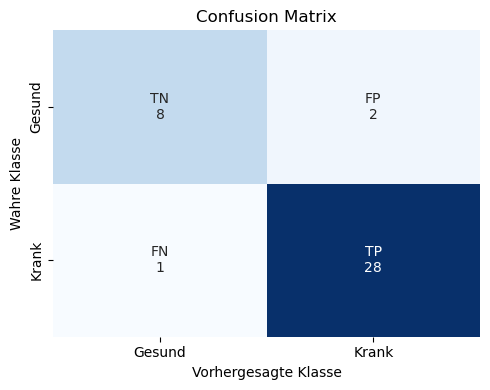

In [718]:
plot_confusion_matrix(y_test, y_pred_lr)

## 6.2 Random Forest Classifier

In [719]:
rf = RandomForestClassifier(random_state=42)

In [720]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [721]:
y_pred_rf = rf.predict(X_test)
y_proba_rf= rf.predict_proba(X_test)[:, 1]

### Evaluation

In [722]:
get_metrics(y_test, y_proba_rf, y_pred_rf)

ROC-AUC: 96.207%
PR-AUC (Average Precision): 98.713%

Classification Report (in %):

              precision  recall  f1-score  support
0                88.889  80.000    84.211   10.000
1                93.333  96.552    94.915   29.000
accuracy         92.308  92.308    92.308    0.923
macro avg        91.111  88.276    89.563   39.000
weighted avg     92.194  92.308    92.170   39.000


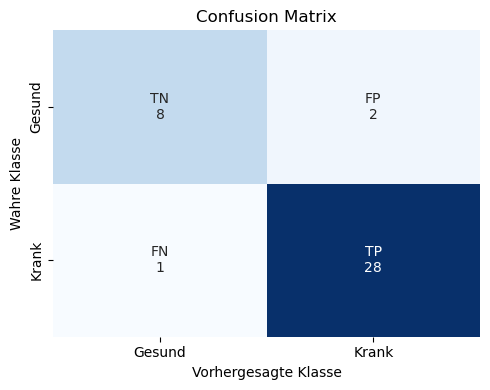

In [723]:
plot_confusion_matrix(y_test, y_pred_rf)

## 6.3. Gradient Boosting Classifier 

In [724]:
gb_pipe = GradientBoostingClassifier(random_state=42)

In [725]:
gb_pipe.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [726]:
y_pred_gb = gb_pipe.predict(X_test)
y_proba_gb = gb_pipe.predict_proba(X_test)[:, 1]

### Evaluation

In [727]:
get_metrics(y_test, y_proba_gb, y_pred_gb)

ROC-AUC: 96.897%
PR-AUC (Average Precision): 99.056%

Classification Report (in %):

              precision  recall  f1-score  support
0                81.818  90.000    85.714   10.000
1                96.429  93.103    94.737   29.000
accuracy         92.308  92.308    92.308    0.923
macro avg        89.123  91.552    90.226   39.000
weighted avg     92.682  92.308    92.423   39.000


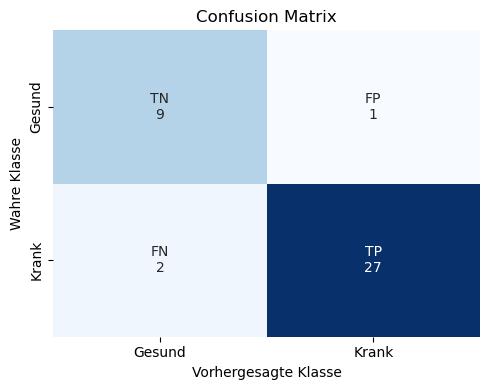

In [728]:
plot_confusion_matrix(y_test, y_pred_gb)

## 6.4. Support Vector Machine (SVM)

In [729]:
svm_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(probability=True)) # default nicht-linear
])

In [730]:
svm_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(probability=True))])

In [731]:
y_pred_svm = svm_pipe.predict(X_test)
y_proba_svm = svm_pipe.predict_proba(X_test)[:, 1]

### Evaluation

In [732]:
get_metrics(y_test, y_proba_svm, y_pred_svm)

ROC-AUC: 95.517%
PR-AUC (Average Precision): 98.297%

Classification Report (in %):

              precision   recall  f1-score  support
0               100.000   70.000    82.353   10.000
1                90.625  100.000    95.082   29.000
accuracy         92.308   92.308    92.308    0.923
macro avg        95.312   85.000    88.717   39.000
weighted avg     93.029   92.308    91.818   39.000


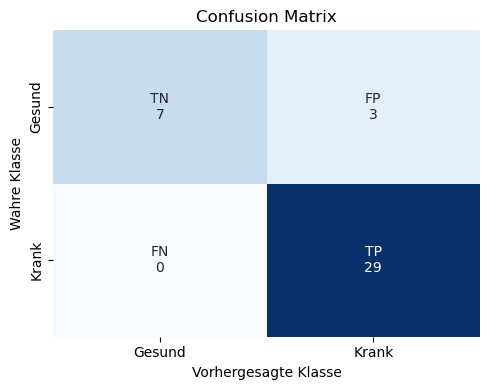

In [733]:
plot_confusion_matrix(y_test, y_pred_svm)

## 6.5. k-NN Classifier

In [734]:
knn_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier())
])

In [735]:
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [736]:
y_pred_knn = knn_pipe.predict(X_test)
y_proba_knn = knn_pipe.predict_proba(X_test)[:, 1]

### Evaluation

In [737]:
get_metrics(y_test, y_proba_svm, y_pred_svm)

ROC-AUC: 95.517%
PR-AUC (Average Precision): 98.297%

Classification Report (in %):

              precision   recall  f1-score  support
0               100.000   70.000    82.353   10.000
1                90.625  100.000    95.082   29.000
accuracy         92.308   92.308    92.308    0.923
macro avg        95.312   85.000    88.717   39.000
weighted avg     93.029   92.308    91.818   39.000


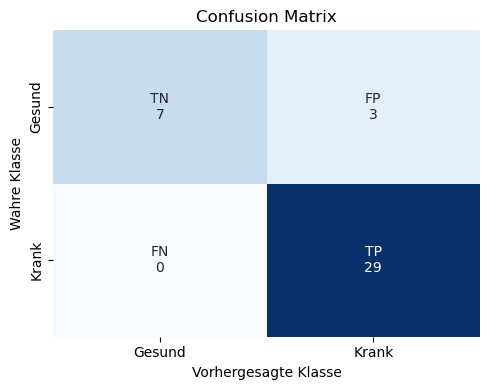

In [738]:

plot_confusion_matrix(y_test, y_pred_svm)

# 7. Cross-Validation und Feature Selection

Zur robusten Bewertung der Generalisierungsleistung wurden alle Baseline-Modelle zusätzlich mittels stratifizierter 5-facher Cross-Validation evaluiert. Dabei wurde in jedem Fold die Klassenverteilung beibehalten, um dem unausgeglichenen Datensatz Rechnung zu tragen. Als Evaluationsmetrik wurde die ROC-AUC verwendet, da sie unabhängig von einem festen Entscheidungsschwellenwert ist und sich besonders für Klassifikationsprobleme mit Klassenungleichgewicht eignet.
Der Mittelwert der ROC-AUC gibt die durchschnittliche Modellleistung an, während die Standardabweichung Aufschluss über die Stabilität der Ergebnisse über verschiedene Datenaufteilungen hinweg liefert.

### Zusammenfassung: 

|  Rang | Modell                           | CV ROC-AUC (Mittelwert ± Std.) |
| ----: | -------------------------------- | -----------------------------: |
| **1** | **k-Nearest Neighbors (k-NN)**   |           **97.17 % ± 1.01 %** |
| **2** | **Gradient Boosting Classifier** |           **96.23 % ± 3.08 %** |
| **3** | **Random Forest Classifier**     |           **95.92 % ± 2.85 %** |
| **4** | **Logistic Regression**          |           **90.50 % ± 4.25 %** |
| **5** | **Support Vector Machine (SVM)** |           **89.06 % ± 6.14 %** |

Die Ergebnisse zeigen, dass insbesondere nichtlineare Modelle eine hohe und stabile Trennschärfe erzielen. Der k-Nearest Neighbors Classifier erreicht sowohl die höchste mittlere ROC-AUC als auch die geringste Varianz und weist damit die stabilste Leistung auf. Random Forest und Gradient Boosting erzielen ebenfalls hohe Werte, zeigen jedoch etwas stärkere Schwankungen über die 5 Folds hinweg.

Die Logistic Regression zeigt als lineares Modell geringere Leistungen, während nichtlineare Modelle insgesamt besser abschneiden. Die Support Vector Machine weist trotz nichtlinearer Modellierung eine höhere Varianz auf, was auf eine stärkere Abhängigkeit von Datenaufteilung und Hyperparametern schließen lässt.

In [739]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


## 7.1. Logistic Regression

In [740]:
scores = cross_val_score(
    lr_pipe,
    X,
    y,
    cv=cv,
    scoring="roc_auc"
)

print(f"CV ROC-AUC: {scores.mean()*100:.2f}% ± {scores.std()*100:.2f}%")

CV ROC-AUC: 90.50% ± 4.25%


## 7.2. Random Forest

In [741]:
scores = cross_val_score(
    rf,
    X,
    y,
    cv=cv,
    scoring="roc_auc"
)

print(f"CV ROC-AUC: {scores.mean()*100:.2f}% ± {scores.std()*100:.2f}%")

CV ROC-AUC: 96.16% ± 2.84%


## 7.3 Gradient Boosting Classifier

In [742]:
scores = cross_val_score(
    gb_pipe,
    X,
    y,
    cv=cv,
    scoring="roc_auc"
)

print(f"CV ROC-AUC: {scores.mean()*100:.2f}% ± {scores.std()*100:.2f}%")

CV ROC-AUC: 96.17% ± 3.08%


## 7.4 Support Vector Machine

In [743]:
scores = cross_val_score(
    svm_pipe,
    X,
    y,
    cv=cv,
    scoring="roc_auc"
)

print(f"CV ROC-AUC: {scores.mean()*100:.2f}% ± {scores.std()*100:.2f}%")

CV ROC-AUC: 89.06% ± 6.14%


## 7.5 k-NN Classifier

In [744]:
scores = cross_val_score(
    knn_pipe,
    X,
    y,
    cv=cv,
    scoring="roc_auc"
)

print(f"CV ROC-AUC: {scores.mean()*100:.2f}% ± {scores.std()*100:.2f}%")

CV ROC-AUC: 97.17% ± 1.01%


# 8. Feature Selection
In einer Studie von Wrobel (2021) konnte gezeigt werden, dass der Einsatz von Feature-Selection-Methoden bei der Klassifikation von Parkinson-Sprachdaten zu einer deutlichen Verbesserung der Modellleistung führt. Insbesondere erzielten nahezu alle untersuchten Klassifikatoren nach Merkmalsreduktion höhere Klassifikationsgenauigkeiten. Vor diesem Hintergrund wurde auch in der vorliegenden Arbeit eine Feature Selection durchgeführt [15]. 

Die Feature Selection erfolgt mittels Random Forest auf dem Trainingsdatensatz. Ziel ist es, redundante Features zu identifizieren und aus dem Datensatz zu entfernen. Dabei hat der Random-Forest-Algorithmus alle Shimmer-Merkmale ausgeschlossen, da diese stark mit Jitter- und Rauschmaßen korrelieren und keinen zusätzlichen Informationsgewinn liefern.

Ausgewählte Features:

- MDVP:Fo(Hz)
- MDVP:Fhi(Hz)
- MDVP:Flo(Hz)
- MDVP:RAP
- Jitter:DDP
- NHR 
- spread1
- PPE


In [751]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

fs = SelectFromModel(rf, prefit=True)

selected_features = X_train.columns[fs.get_support()]

X_train_sel = X_train[selected_features]
X_test_sel  = X_test[selected_features]

In [752]:
X_test_sel.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:RAP', 'Jitter:DDP',
       'NHR', 'spread1', 'PPE'],
      dtype='object')

# 9. Modelltraining mit selektierten Features

ie Modelle zeigten nach Anwendung der Feature Selection eine durchgängig geringere Performance. Dies deutet darauf hin, dass die entfernten Merkmale – insbesondere Shimmer-Features – trotz Redundanz relevante Zusatzinformationen enthielten.

### Zusammenfassung
|  Rang | Modell                           | ROC-AUC (%) | PR-AUC (%) | Accuracy (%) | F1-Score (weighted, %) |
| ----: | -------------------------------- | ----------: | ---------: | -----------: | ---------------------: |
| **1** | **Gradient Boosting Classifier** |  **93.793** | **97.991** |   **79.487** |             **79.487** |
| **2** | **k-NN Classifier**              |      92.586 |     96.627 |       87.179 |                 86.951 |
| **3** | **Support Vector Machine (SVM)** |      91.724 |     96.530 |       89.744 |                 89.345 |
| **4** | **Logistic Regression**          |      89.310 |     95.725 |       87.179 |                 87.372 |

Da der Random Forest bereits zur Feature Selection eingesetzt wurde und während des Fit-Prozesses implizit eine Merkmalsauswahl vornimmt, wurde auf ein erneutes Training dieses Modells auf dem reduzierten Feature-Set verzichtet.

## 9.1 Logistic Regression

In [756]:

lr_pipe.fit(X_train_sel, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', LogisticRegression(max_iter=1000))])

In [757]:
s_y_pred_lr  = lr_pipe.predict(X_test_sel)
s_y_proba_lr = lr_pipe.predict_proba(X_test_sel)[:, 1]

### Evaluation

In [758]:
get_metrics(y_test, s_y_proba_lr, s_y_pred_lr)

ROC-AUC: 89.310%
PR-AUC (Average Precision): 95.725%

Classification Report (in %):

              precision  recall  f1-score  support
0                72.727  80.000    76.190   10.000
1                92.857  89.655    91.228   29.000
accuracy         87.179  87.179    87.179    0.872
macro avg        82.792  84.828    83.709   39.000
weighted avg     87.696  87.179    87.372   39.000


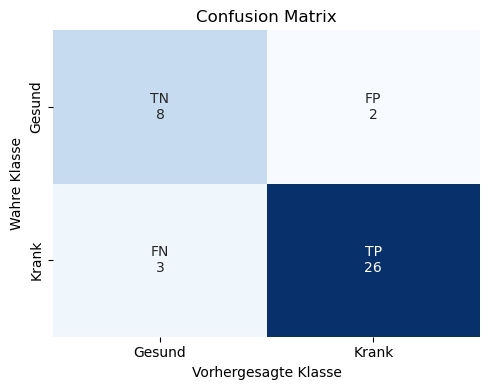

In [759]:
plot_confusion_matrix(y_test, s_y_pred_lr)

## 9.2 Support Vector Machine

In [760]:

svm_pipe.fit(X_train_sel, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(probability=True))])

In [761]:
s_y_pred_lr  = svm_pipe.predict(X_test_sel)
s_y_proba_lr = svm_pipe.predict_proba(X_test_sel)[:, 1]

### Evaluation

In [762]:
get_metrics(y_test, s_y_proba_lr, s_y_pred_lr)

ROC-AUC: 91.724%
PR-AUC (Average Precision): 96.530%

Classification Report (in %):

              precision  recall  f1-score  support
0                87.500  70.000    77.778   10.000
1                90.323  96.552    93.333   29.000
accuracy         89.744  89.744    89.744    0.897
macro avg        88.911  83.276    85.556   39.000
weighted avg     89.599  89.744    89.345   39.000


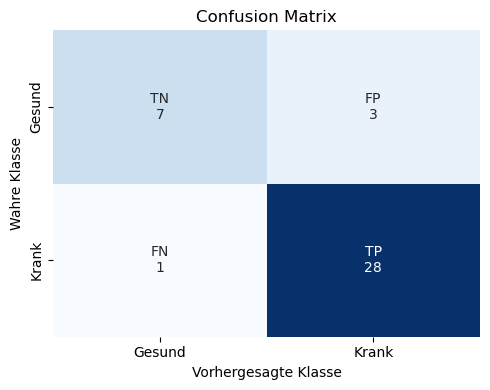

In [763]:
plot_confusion_matrix(y_test, s_y_pred_lr)

## 9.3 k-NN 

In [764]:

knn_pipe.fit(X_train_sel, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [765]:
s_y_pred_lr  = knn_pipe.predict(X_test_sel)
s_y_proba_lr = knn_pipe.predict_proba(X_test_sel)[:, 1]

### Evaluation

In [766]:
get_metrics(y_test, s_y_proba_lr, s_y_pred_lr)

ROC-AUC: 92.586%
PR-AUC (Average Precision): 96.627%

Classification Report (in %):

              precision  recall  f1-score  support
0                77.778  70.000    73.684   10.000
1                90.000  93.103    91.525   29.000
accuracy         87.179  87.179    87.179    0.872
macro avg        83.889  81.552    82.605   39.000
weighted avg     86.866  87.179    86.951   39.000


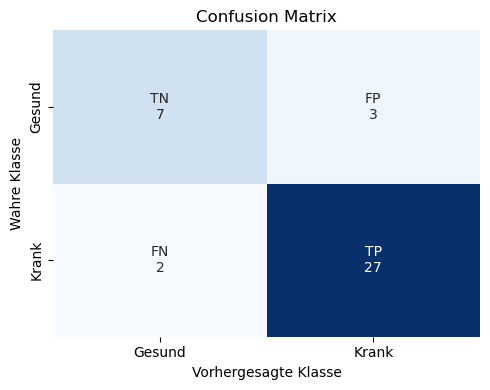

In [767]:
plot_confusion_matrix(y_test, s_y_pred_lr)

## 9.4 Gradient Boosting Classification

In [768]:

gb_pipe.fit(X_train_sel, y_train)

GradientBoostingClassifier()

In [769]:
s_y_pred_lr  = gb_pipe.predict(X_test_sel)
s_y_proba_lr = gb_pipe.predict_proba(X_test_sel)[:, 1]

### Evaluation

In [770]:
get_metrics(y_test, s_y_proba_lr, s_y_pred_lr)

ROC-AUC: 93.793%
PR-AUC (Average Precision): 97.991%

Classification Report (in %):

              precision  recall  f1-score  support
0                60.000  60.000    60.000   10.000
1                86.207  86.207    86.207   29.000
accuracy         79.487  79.487    79.487    0.795
macro avg        73.103  73.103    73.103   39.000
weighted avg     79.487  79.487    79.487   39.000


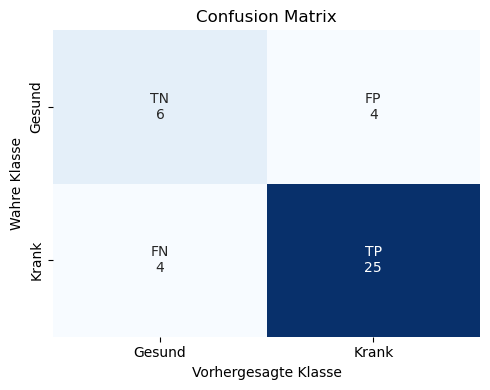

In [771]:
plot_confusion_matrix(y_test, s_y_pred_lr)

# 8. Fazit
Obwohl die gesunde Klasse deutlich unterrepräsentiert ist, erzielten alle untersuchten Modelle hohe Klassifikationsleistungen. Dies lässt darauf schließen, dass insbesondere nichtlineare Sprachmerkmale eine starke Trennschärfe zur Parkinsondiagnostik aufweisen.

Die Evaluation der Baseline-Modelle zeigte, dass nichtlineare Verfahren wie Random Forest, Gradient Boosting und k-Nearest Neighbors den linearen Ansätzen überlegen sind. Die zusätzliche Bewertung mittels stratifizierter Cross-Validation bestätigte diese Beobachtung und verdeutlichte zugleich, dass schwellenwertunabhängige Metriken wie ROC-AUC und PR-AUC bei kleinen Testmengen besser geeignet sind als Accuracy. Der Einsatz einer Random-Forest-basierten Feature Selection führte entgegen der Erwartung zu einer durchgängig schlechteren Modellleistung, was darauf hindeutet, dass auch stark korrelierte Merkmale – insbesondere Shimmer-Features – relevante Zusatzinformationen liefern und zur Stabilisierung der Modelle beitragen.

Insgesamt erwies sich der Random Forest Classifier als das leistungsstärkste und zugleich robusteste Modell im gesamten Analyseprozess. Er erzielte sowohl in der Baseline-Evaluation als auch im Vergleich der Modellvarianten die besten Ergebnisse.

# 9. Ausblick

In zukünftigen Arbeiten würde ich gerne reale Audiodateien direkt analysieren. Die vorliegende Arbeit diente primär dazu, ein grundlegendes Verständnis relevanter Merkmale für die Parkinson-Diagnostik auf Basis tabellarischer Sprachfeatures zu entwickeln. Aufbauend auf diesen Erkenntnissen bietet es sich an, den Figshare-Datensatz mit Roh-Audioaufnahmen [4] zu verwenden, um realistische Sprachsignale zu untersuchen und moderne, audio-basierte Analyseansätze umzusetzen. Die Auswertung der Audiodaten könnte mithilfe von Parselmouth [3], einer Python-Schnittstelle zu Praat, erfolgen, wodurch eine präzise und reproduzierbare Extraktion phonetischer und akustischer Merkmale ermöglicht wird.

# 10. Quellen
**[1]** Deutsche Gesellschaft für Parkinson und Bewegungsstörungen e. V. (o. J.). *Die Parkinson-Krankheit*. Abgerufen am *29. Dezember 2025*, von https://parkinson-gesellschaft.de/fuer-betroffene/die-parkinson-krankheit/

**[2]** Cao, F., Vogel, A. P., Gharahkhani, P., & Renteria, M. E. (2025). *Speech and language biomarkers for Parkinson’s disease prediction, early diagnosis and progression.* *npj Parkinson’s Disease, 11*(57). https://doi.org/10.1038/s41531-025-00913-4

**[3]** Jadoul, Y., Thompson, B., & de Boer, B. (2018). *Introducing Parselmouth: A Python interface to Praat*. *Journal of Phonetics, 71*, 1–15. [https://doi.org/10.1016/j.wocn.2018.07.001](https://doi.org/10.1016/j.wocn.2018.07.001) 

**[4]** Sakar, C. O., Serbes, G., & Gunduz, A. (2023). *Voice samples for patients with Parkinson’s disease and healthy controls* [Data set]. Figshare. [https://doi.org/10.6084/m9.figshare.23849127](https://doi.org/10.6084/m9.figshare.23849127)

**[5]** A Tsanas, MA Little, PE McSharry, LO Ramig (2009)
'Accurate telemonitoring of Parkinson.s disease progression by non-invasive speech tests',IEEE Transactions on Biomedical Engineering [https://doi.org/10.24432/C56C7T](https://doi.org/10.24432/C56C7T)

**[6]** DataCamp. (n.d.). Measures of central tendency in Python. Abgerufen am 6. Januar 2026, von https://www.datacamp.com/de/tutorial/central-tendency

**[7]** Yulianti, Y., Syapariyah, A. N., & Saifudin, A. (2020). Feature selection techniques to choose the best features for Parkinson’s disease predictions based on decision tree. Journal of Physics: Conference Series, 1477(3), 032008. https://doi.org/10.1088/1742-6596/1477/3/032008

**[8]** Farrús, M., & Morales, M. (2007). *Evaluation of voice perturbation measures for automatic speaker recognition*. In *Proceedings of Interspeech 2007* (pp. 1414–1417). ISCA. [https://www.isca-archive.org/interspeech_2007/farrus07_interspeech.pdf](https://www.isca-archive.org/interspeech_2007/farrus07_interspeech.pdf)

**[9]** CVT Research. (n.d.). *Relative Average Perturbation (RAP)*. Abgerufen am 8. Januar 2026, von [https://cvtresearch.com/relative-average-perturbation/](https://cvtresearch.com/relative-average-perturbation/)

**[10]** Boersma, P., & Weenink, D. (n.d.). *PointProcess: Get jitter (ddp)*. Praat Manual. Abgerufen am 8. Januar 2026, von [https://www.fon.hum.uva.nl/praat/manual/PointProcess__Get_jitter__ddp____.html](https://www.fon.hum.uva.nl/praat/manual/PointProcess__Get_jitter__ddp____.html)

**[11]** Wikipedia. (n.d.). *Shimmer*. Abgerufen am 8. Januar 2026, von [https://de.wikipedia.org/wiki/Shimmer](https://de.wikipedia.org/wiki/Shimmer)

**[12]** Boersma, P., & Weenink, D. (n.d.). *Voice 3: Shimmer*. Praat Manual. Abgerufen am 8. Januar 2026, von [https://www.fon.hum.uva.nl/praat/manual/Voice_3__Shimmer.html](https://www.fon.hum.uva.nl/praat/manual/Voice_3__Shimmer.html)

**[13]** Boersma, P., & Weenink, D. (n.d.). *Harmonicity*. Praat Manual. Abgerufen am 8. Januar 2026, von [https://www.fon.hum.uva.nl/praat/manual/Harmonicity.html](https://www.fon.hum.uva.nl/praat/manual/Harmonicity.html)

**[14]** Wijaya, C. Y. (2024). Is it necessary for feature scaling in tree-based models? - NBD Lite #20. Retrieved from https://www.nb-data.com/p/is-it-necessary-for-feature-scaling

**[15]** Wrobel, K. (2021). Diagnosing Parkinson’s disease by means of ensemble classification of patients’ voice samples. Procedia Computer Science, 192, 3905–3914. https://doi.org/10.1016/j.procs.2021.09.165
 